In [1]:
#!pip install chessboard

In [2]:
import chess
import random
import math
from copy import deepcopy

In [3]:
#print(board.__doc__)
#dir(board)

In [4]:
def make_move(board, move):
    board.push_san(move)

In [5]:
def get_ai_move(board):
    '''Get a move for the black player.
    
    Available move generators:
        random_move
        minmax
    '''
    #return minmax(board, chess.BLACK)
    return random_move(board)
                       
def random_move(board):
    '''Return a random move from available legal moves.
    '''
    return random.choice([move.__str__() for move in board.legal_moves])

In [6]:
def minmax(board, current_player):
    '''Find the best move on the given board by the minmax algorithm'''
    depth = 5
    return minmaxREK(board, depth, current_player, None, True)

def minmaxREK(board, depth, current_player, current_move, maximizing):
    '''Helper function to minmax
    
    board - chess.Board object
    depth - recursion depth
    current_player - chess.BLACK or chess.WHITE, according to who called the function
    current_move - str (in UCI format), the previously best move to fall back to when recursion depth is reached
    maximizing - True or False, whether the current call tries to maximze or min
    '''
    if board.is_game_over():
        w = board.outcome().winner
        if w == current_player:
            return current_turn, math.inf
        else:
            return current_turn, -math.inf
    elif depth <= 0:
        return current_turn, evaluate_board(board, current_player)
    
    if maximizing:
        return maximizer(board, depth, current_player, maximizing)
    else:
        return minimizer(board, depth, current_player, maximizing)

In [7]:
def maximizer(board, depth, current_player, maximizing):
    all_moves = board.legal_moves
    
    if len(all_moves) == 0:
        return None, -math.inf
    
    best_move = random.choice(all_moves)
    best_rate = -math.inf
    
    for move in all_moves:
        b = deepcopy(board)
        make_move(b, move)
        
        if depth > 0:
            _, rate = minimaxREK(b, depth - 1, current_player, not maximizing, move)
        else:
            rate = evaluate_board(b, current_player)
            
        if rate > best_rate:
            best_rate = rate
            best_move = move
            
    return best_move, best_rate

def minimizer(board, depth, current_player, maximizing):
    all_moves = board.legal_moves
    
    if len(all_moves) == 0:
        return None, math.inf
    
    best_move = random.choice(all_moves)
    best_rate = math.inf
    
    for move in all_moves:
        b = deepcopy(board)
        make_move(b, move)
        
        if depth > 0:
            _, rate = minimaxREK(b, depth - 1, current_player, not maximizing, move)
        else:
            rate = evaluate_board(b, current_player)
            
        if rate < best_rate:
            best_rate = rate
            best_move = move
            
    return best_move, best_rate

In [8]:
def evaluate_board(board, current_player):
    ...

In [9]:
def to_san(board, move):
    '''Convert UCI move format to SAN format (ex. c3e4 -> Ne4)'''
    return board.san(board.parse_uci(move))
def to_uci(board, move):
    '''Convert SAN move format to UCI format (ex. Ne4 -> c3e4)'''
    return board.uci(board.parse_san(move))

# Testing

In [10]:
board = chess.Board()
print(to_san(board, 'g1f3'))
print(to_uci(board, 'Nf3'))

Nf3
g1f3


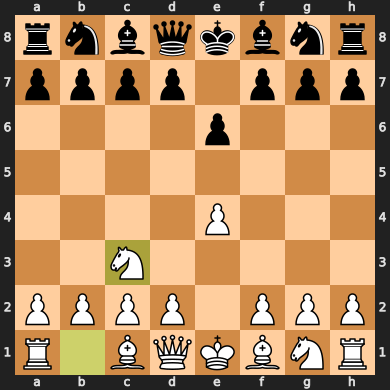

In [11]:
board = chess.Board()

moves = ['e2e4', 'e7e6', 'b1c3']
for move in moves:
    make_move(board, move)
    
display(board)
x = 0

In [12]:
#[move.__str__() for move in board.legal_moves]

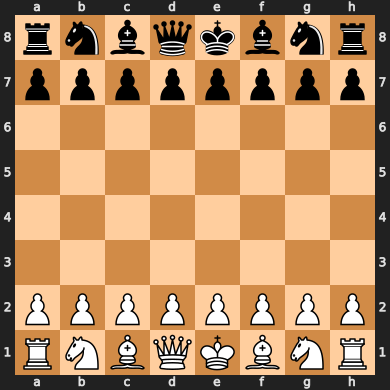

Legal moves
	 ['Nh3', 'Nf3', 'Nc3', 'Na3', 'h3', 'g3', 'f3', 'e3', 'd3', 'c3', 'b3', 'a3', 'h4', 'g4', 'f4', 'e4', 'd4', 'c4', 'b4', 'a4']
Opponent played: b7b5


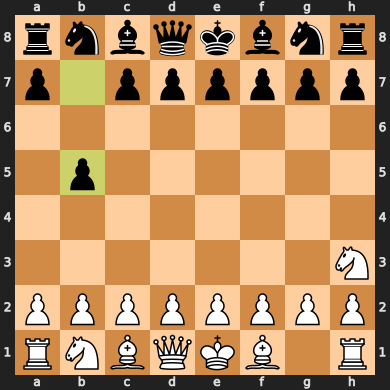




Legal moves
	 ['Ng5', 'Nf4', 'Ng1', 'Rg1', 'Nc3', 'Na3', 'g3', 'f3', 'e3', 'd3', 'c3', 'b3', 'a3', 'g4', 'f4', 'e4', 'd4', 'c4', 'b4', 'a4']
Opponent played: b5b4


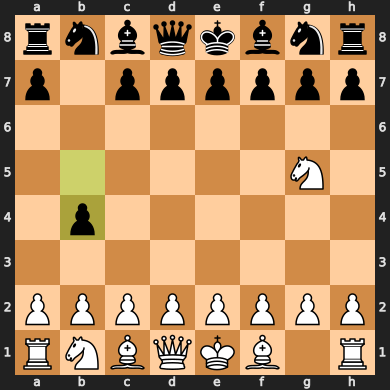




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Nf3', 'Rg1', 'Nc3', 'Na3', 'h3', 'g3', 'f3', 'e3', 'd3', 'c3', 'b3', 'a3', 'h4', 'g4', 'f4', 'e4', 'd4', 'c4', 'a4']
Opponent played: g8f6


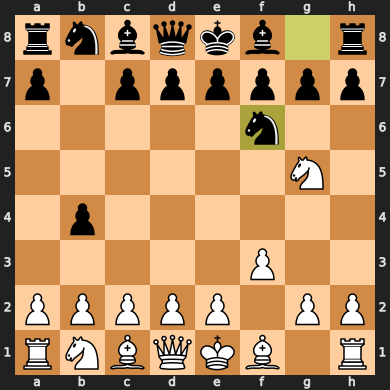




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Rg1', 'Kf2', 'Nc3', 'Na3', 'f4', 'h3', 'g3', 'e3', 'd3', 'c3', 'b3', 'a3', 'h4', 'g4', 'e4', 'd4', 'c4', 'a4']
Opponent played: g7g6


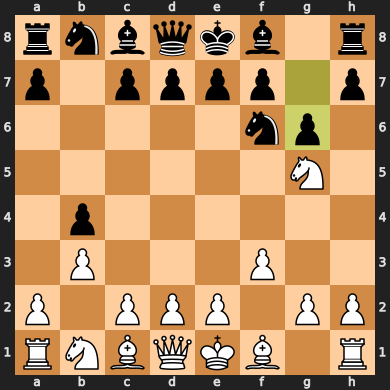




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Rg1', 'Kf2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'f4', 'h3', 'g3', 'e3', 'd3', 'c3', 'a3', 'h4', 'g4', 'e4', 'd4', 'c4', 'a4']
Opponent played: e7e5


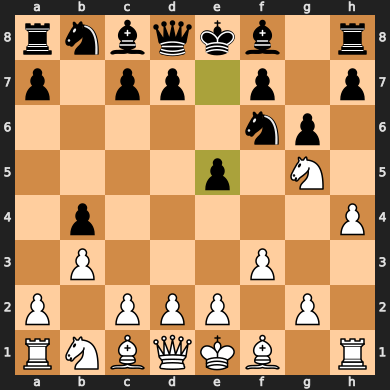




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Rh3', 'Rh2', 'Rg1', 'Kf2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'h5', 'f4', 'g3', 'e3', 'd3', 'c3', 'a3', 'g4', 'e4', 'd4', 'c4', 'a4']
Opponent played: f6g4


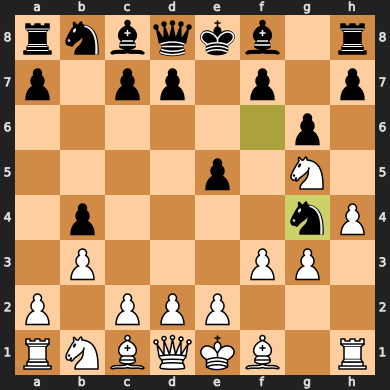




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Rh3', 'Rh2', 'Rg1', 'Bh3', 'Bg2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'fxg4', 'h5', 'f4', 'e3', 'd3', 'c3', 'a3', 'e4', 'd4', 'c4', 'a4']
Opponent played: a7a5


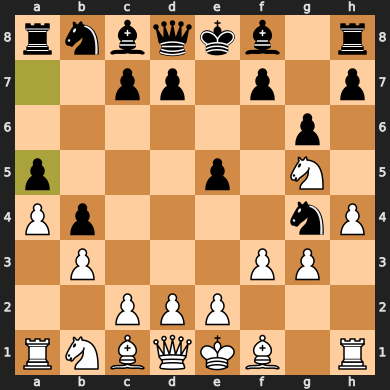




Legal moves
	 ['Nxh7', 'Nxf7', 'Ne6', 'Ne4', 'Nh3', 'Rh3', 'Rh2', 'Rg1', 'Bh3', 'Bg2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'fxg4', 'h5', 'f4', 'e3', 'd3', 'c3', 'e4', 'd4', 'c4']
Opponent played: f7f5


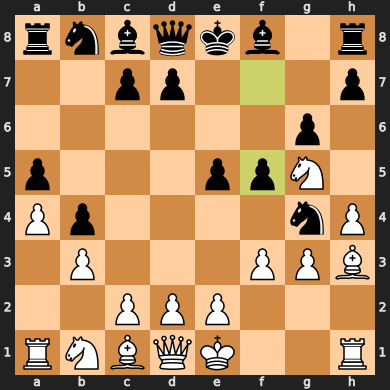




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Bxg4', 'Bg2', 'Bf1', 'Rh2', 'Rg1', 'Rf1', 'Kf1', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'O-O', 'fxg4', 'h5', 'f4', 'e3', 'd3', 'c3', 'e4', 'd4', 'c4']
Opponent played: c8a6


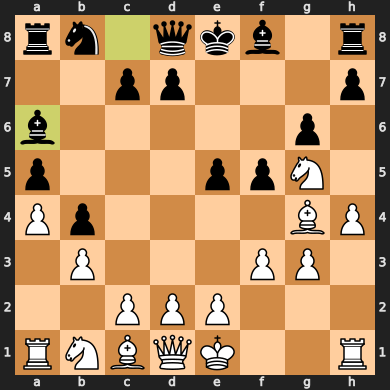




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Nh3', 'Bh5', 'Bxf5', 'Bh3', 'Rh3', 'Rh2', 'Rg1', 'Rf1', 'Kf2', 'Kf1', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'O-O', 'h5', 'f4', 'e3', 'd3', 'c3', 'e4', 'd4', 'c4']
Opponent played: a6d3


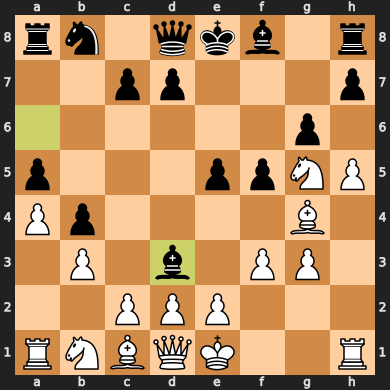




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Nh3', 'Bxf5', 'Bh3', 'Rh4', 'Rh3', 'Rh2', 'Rg1', 'Rf1', 'Kf2', 'Kf1', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'O-O', 'hxg6', 'exd3', 'cxd3', 'h6', 'f4', 'e3', 'c3', 'e4', 'c4']
Opponent played: d3e2


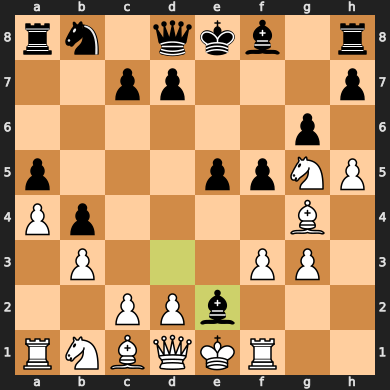




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Nh3', 'Bxf5', 'Bh3', 'Rf2', 'Rh1', 'Rg1', 'Kf2', 'Kxe2', 'Qxe2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'hxg6', 'h6', 'f4', 'd3', 'c3', 'd4', 'c4']
Opponent played: f5g4


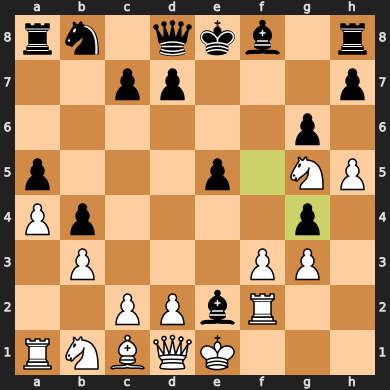




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Nh3', 'Rh2', 'Rg2', 'Rxe2', 'Rf1', 'Kxe2', 'Qxe2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'hxg6', 'fxg4', 'h6', 'f4', 'd3', 'c3', 'd4', 'c4']
Opponent played: c7c5


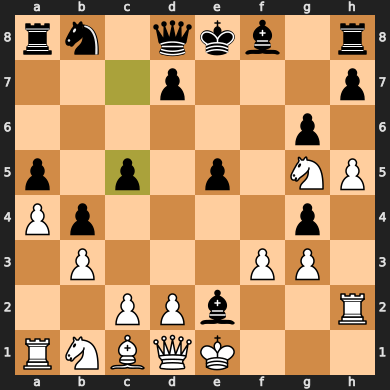




Legal moves
	 ['Nxh7', 'Nf7', 'Ne6', 'Ne4', 'Nh3', 'Rh4', 'Rh3', 'Rg2', 'Rf2', 'Rxe2', 'Rh1', 'Kf2', 'Kxe2', 'Qxe2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'hxg6', 'fxg4', 'h6', 'f4', 'd3', 'c3', 'd4', 'c4']
Opponent played: e2d3


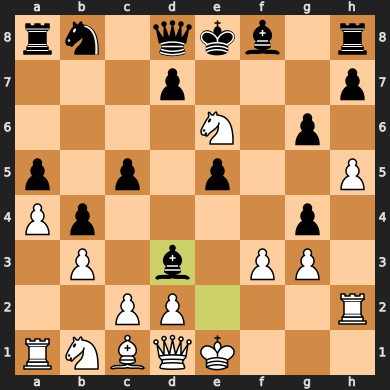




Legal moves
	 ['Nxf8', 'Nxd8', 'Ng7+', 'Nc7+', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Rh4', 'Rh3', 'Rg2', 'Rf2', 'Re2', 'Rh1', 'Kf2', 'Qe2', 'Ba3', 'Bb2', 'Nc3', 'Na3', 'Ra3', 'Ra2', 'hxg6', 'fxg4', 'cxd3', 'h6', 'f4', 'c3', 'c4']
Opponent played: d7d5


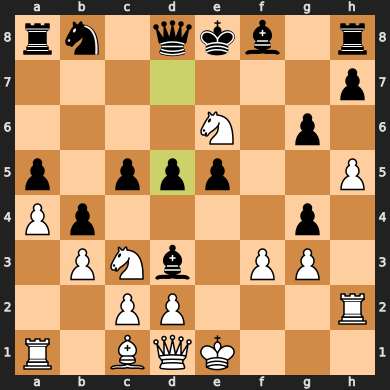




Legal moves
	 ['Nxf8', 'Nxd8', 'Ng7+', 'Nc7+', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nxd5', 'Nb5', 'Ne4', 'Ne2', 'Na2', 'Nb1', 'Rh4', 'Rh3', 'Rg2', 'Rf2', 'Re2', 'Rh1', 'Kf2', 'Qe2', 'Ba3', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'cxd3', 'h6', 'f4']
Opponent played: d3f5


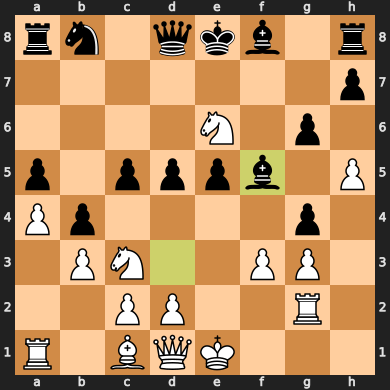




Legal moves
	 ['Nxf8', 'Nxd8', 'Ng7+', 'Nc7+', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nxd5', 'Nb5', 'Ne4', 'Ne2', 'Na2', 'Nb1', 'Rh2', 'Rf2', 'Re2', 'Rg1', 'Kf2', 'Ke2', 'Kf1', 'Qe2', 'Ba3', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4', 'd3', 'd4']
Opponent played: b8a6


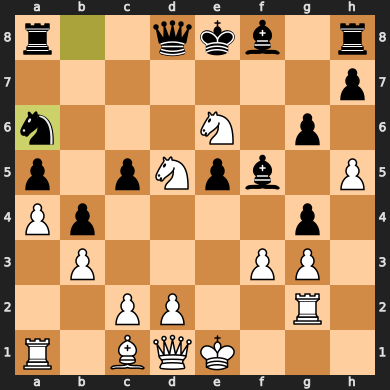




Legal moves
	 ['Nxf8', 'Nxd8', 'Ng7+', 'Nec7+', 'Ng5', 'Nxc5', 'Nef4', 'Nd4', 'Ne7', 'Ndc7+', 'Nf6+', 'Nb6', 'Ndf4', 'Nxb4', 'Ne3', 'Nc3', 'Rh2', 'Rf2', 'Re2', 'Rg1', 'Kf2', 'Ke2', 'Kf1', 'Qe2', 'Ba3', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4', 'd3', 'c3', 'd4', 'c4']
Opponent played: f8e7


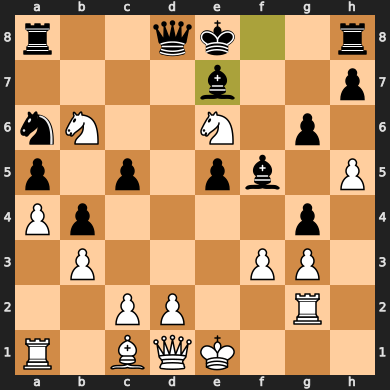




Legal moves
	 ['Nf8', 'Nxd8', 'Ng7+', 'Nc7+', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Nxa8', 'Nd7', 'Nd5', 'Nc4', 'Rh2', 'Rf2', 'Re2', 'Rg1', 'Kf2', 'Ke2', 'Kf1', 'Qe2', 'Ba3', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4', 'd3', 'c3', 'd4', 'c4']
Opponent played: d8d2


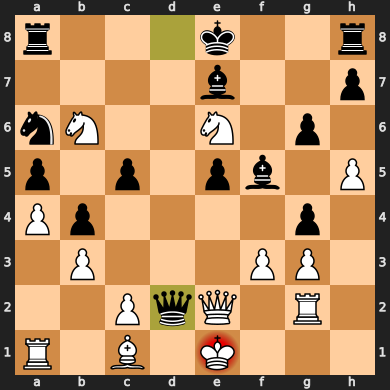




Legal moves
	 ['Kf2', 'Kxd2', 'Kf1', 'Qxd2', 'Bxd2']
Opponent played: d2d8


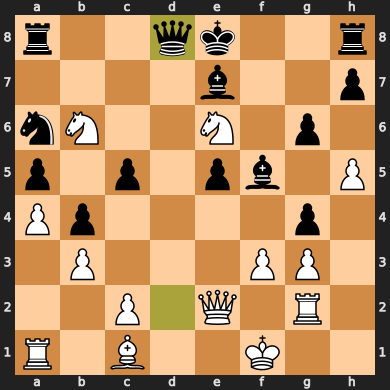




Legal moves
	 ['Nf8', 'Nxd8', 'Ng7+', 'Nc7+', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Nxa8', 'Nd7', 'Nd5', 'Nc4', 'Rh2', 'Rf2', 'Rg1', 'Qxa6', 'Qxe5', 'Qb5+', 'Qe4', 'Qc4', 'Qe3', 'Qd3', 'Qf2', 'Qd2', 'Qe1', 'Qd1', 'Kf2', 'Kg1', 'Ke1', 'Bh6', 'Bg5', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4', 'c3', 'c4']
Opponent played: e8f7


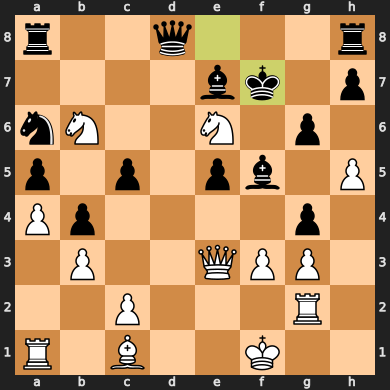




Legal moves
	 ['Nf8', 'Nxd8+', 'Ng7', 'Nc7', 'Ng5+', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Nxa8', 'Nd7', 'Nd5', 'Nc4', 'Qh6', 'Qg5', 'Qxe5', 'Qxc5', 'Qf4', 'Qe4', 'Qd4', 'Qd3', 'Qc3', 'Qf2', 'Qe2', 'Qd2', 'Qg1', 'Qe1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rg1', 'Kf2', 'Ke2', 'Kg1', 'Ke1', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6+', 'fxg4', 'h6', 'f4', 'c3', 'c4']
Opponent played: d8c7


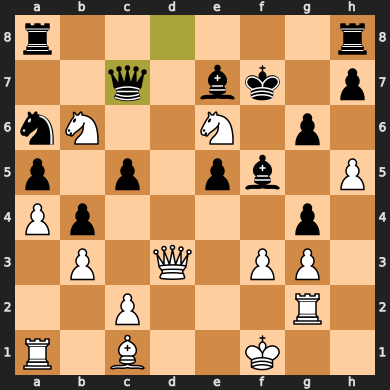




Legal moves
	 ['Nf8', 'Nd8+', 'Ng7', 'Nxc7', 'Ng5+', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Nxa8', 'Nd7', 'Nd5', 'Nc4', 'Qd8', 'Qd7', 'Qd6', 'Qxa6', 'Qxf5+', 'Qd5', 'Qb5', 'Qe4', 'Qd4', 'Qc4', 'Qe3', 'Qc3', 'Qe2', 'Qd2', 'Qd1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rg1', 'Kf2', 'Ke2', 'Kg1', 'Ke1', 'Bh6', 'Bg5', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6+', 'fxg4', 'h6', 'f4', 'c3', 'c4']
Opponent played: a8d8


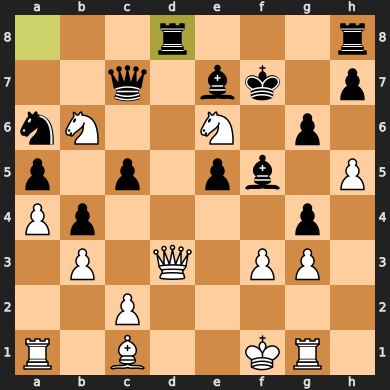




Legal moves
	 ['Nf8', 'Nxd8+', 'Ng7', 'Nxc7', 'Ng5+', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Na8', 'Nd7', 'Nd5', 'Nc4', 'Qxd8', 'Qd7', 'Qd6', 'Qxa6', 'Qxf5+', 'Qd5', 'Qb5', 'Qe4', 'Qd4', 'Qc4', 'Qe3', 'Qc3', 'Qe2', 'Qd2', 'Qd1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke2', 'Ke1', 'Bh6', 'Bg5', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6+', 'fxg4', 'h6', 'f4', 'c3', 'c4']
Opponent played: f7f6


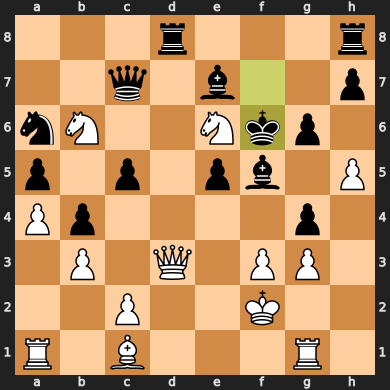




Legal moves
	 ['Nf8', 'Nxd8', 'Ng7', 'Nxc7', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Na8', 'Nd7+', 'Nd5+', 'Nc4', 'Qxd8', 'Qd7', 'Qd6', 'Qxa6', 'Qxf5+', 'Qd5', 'Qb5', 'Qe4', 'Qd4', 'Qc4', 'Qe3', 'Qc3', 'Qe2', 'Qd2', 'Qf1', 'Qd1', 'Ke3', 'Kg2', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Bh6', 'Bg5+', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4', 'c3', 'c4']
Opponent played: d8a8


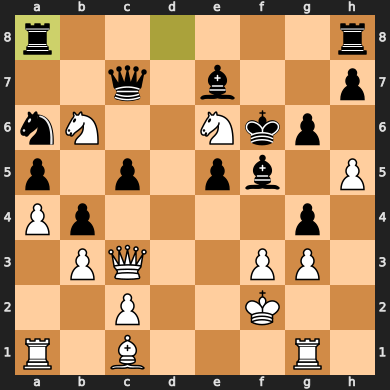




Legal moves
	 ['Nf8', 'Nd8', 'Ng7', 'Nxc7', 'Ng5', 'Nxc5', 'Nf4', 'Nd4', 'Nc8', 'Nxa8', 'Nd7+', 'Nd5+', 'Nc4', 'Qxe5+', 'Qxc5', 'Qd4', 'Qc4', 'Qxb4', 'Qe3', 'Qd3', 'Qd2', 'Qb2', 'Qe1', 'Ke3', 'Kg2', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Bh6', 'Bg5+', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4']
Opponent played: c7d8


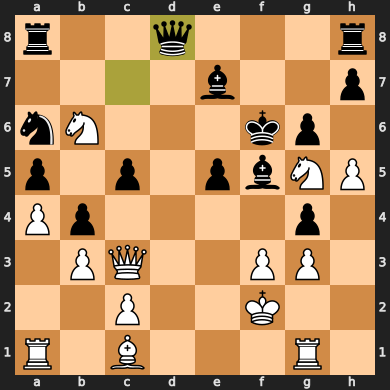




Legal moves
	 ['Nc8', 'Nxa8', 'Nd7+', 'Nd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Qxe5+', 'Qxc5', 'Qd4', 'Qc4', 'Qxb4', 'Qe3', 'Qd3', 'Qd2', 'Qb2', 'Qe1', 'Ke3', 'Kg2', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Bf4', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxg4', 'h6', 'f4']
Opponent played: d8d5


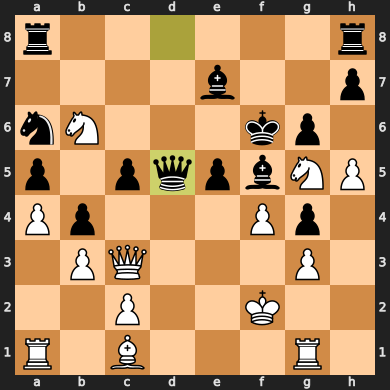




Legal moves
	 ['Nc8', 'Nxa8', 'Nd7+', 'Nxd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Nf3', 'Qxe5+', 'Qxc5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qd2', 'Qb2', 'Qe1', 'Ke3', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'hxg6', 'fxe5+', 'h6']
Opponent played: a8a7


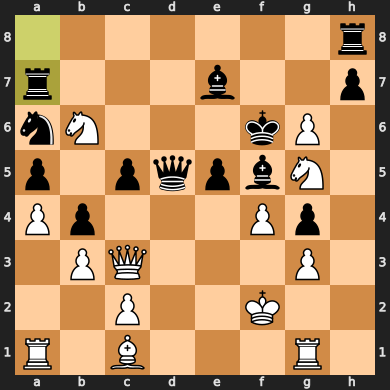




Legal moves
	 ['Nc8', 'Na8', 'Nd7+', 'Nxd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Nf3', 'Qxe5+', 'Qxc5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qd2', 'Qb2', 'Qe1', 'Ke3', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'gxh7', 'fxe5+', 'g7']
Opponent played: h8d8


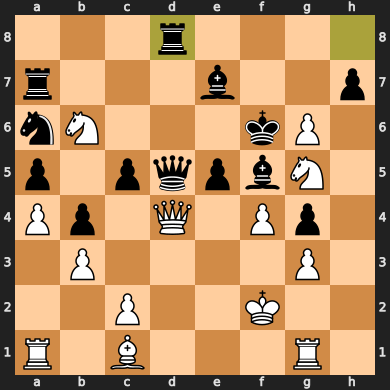




Legal moves
	 ['Nc8', 'Na8', 'Nd7+', 'Nxd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Nf3', 'Qxe5+', 'Qxd5', 'Qxc5', 'Qe4', 'Qc4', 'Qxb4', 'Qe3', 'Qd3', 'Qc3', 'Qd2', 'Qb2', 'Qd1', 'Ke3', 'Ke2', 'Kf1', 'Ke1', 'Rg2', 'Rh1', 'Rf1', 'Re1', 'Rd1', 'Be3', 'Ba3', 'Bd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'gxh7', 'fxe5+', 'g7', 'c3', 'c4']
Opponent played: d5d2


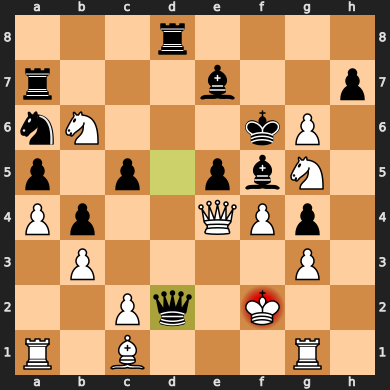




Legal moves
	 ['Kf1', 'Qe2', 'Bxd2']
Opponent played: a7c7


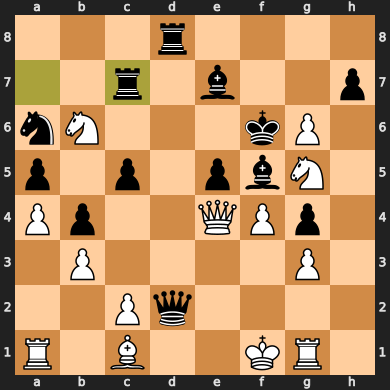




Legal moves
	 ['Nc8', 'Na8', 'Nd7+', 'Nd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Nh3', 'Nf3', 'Qa8', 'Qb7', 'Qc6+', 'Qxf5+', 'Qxe5+', 'Qd5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qg2', 'Qe2', 'Qh1', 'Qe1', 'Rg2', 'Rh1', 'Ba3', 'Bxd2', 'Bb2', 'Ra3', 'Ra2', 'Rb1', 'gxh7', 'fxe5+', 'g7', 'c3', 'c4']
Opponent played: e7f8


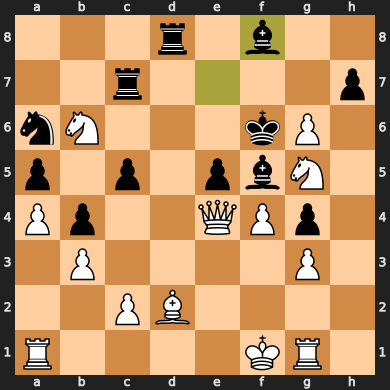




Legal moves
	 ['Nc8', 'Na8', 'Nd7+', 'Nd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Nh3', 'Nf3', 'Qa8', 'Qb7', 'Qc6+', 'Qxf5+', 'Qxe5+', 'Qd5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qg2', 'Qe2', 'Qh1', 'Qe1', 'Bxb4', 'Be3', 'Bc3', 'Be1', 'Bc1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke2', 'Ke1', 'Ra3', 'Ra2', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'gxh7', 'fxe5+', 'g7', 'c3', 'c4']
Opponent played: d8d5


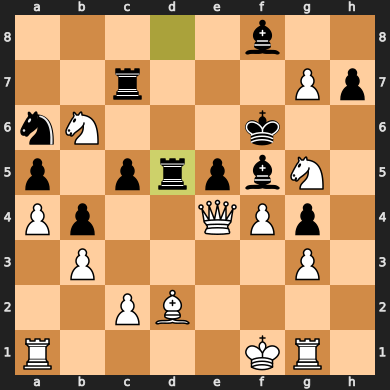




Legal moves
	 ['Nc8', 'Na8', 'Nd7+', 'Nxd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Nh3', 'Nf3', 'Qxf5+', 'Qxe5+', 'Qxd5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qg2', 'Qe2', 'Qh1', 'Qe1', 'Bxb4', 'Be3', 'Bc3', 'Be1', 'Bc1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke2', 'Ke1', 'Ra3', 'Ra2', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'gxf8=Q+', 'gxf8=R+', 'gxf8=B', 'gxf8=N', 'fxe5+', 'g8=Q', 'g8=R', 'g8=B', 'g8=N+', 'c3', 'c4']
Opponent played: f8e7


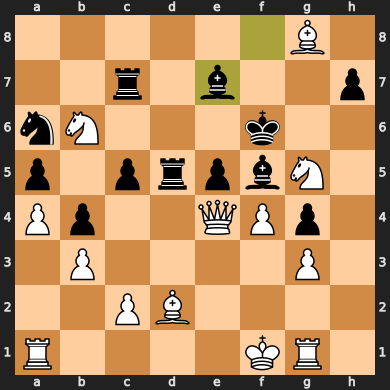




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bxd5', 'Nc8', 'Na8', 'Nd7+', 'Nxd5+', 'Nc4', 'Nxh7+', 'Nf7', 'Ne6', 'Nh3', 'Nf3', 'Qxf5+', 'Qxe5+', 'Qxd5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qg2', 'Qe2', 'Qh1', 'Qe1', 'Bxb4', 'Be3', 'Bc3', 'Be1', 'Bc1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke2', 'Ke1', 'Ra3', 'Ra2', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'fxe5+', 'c3', 'c4']
Opponent played: d5d7


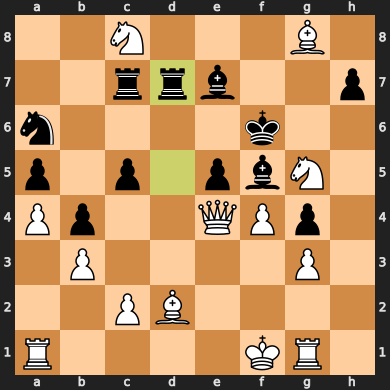




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Nxh7+', 'Nf7', 'Ne6', 'Nh3', 'Nf3', 'Qa8', 'Qb7', 'Qc6+', 'Qxf5+', 'Qxe5+', 'Qd5', 'Qd4', 'Qc4', 'Qxb4', 'Qf3', 'Qe3', 'Qd3', 'Qg2', 'Qe2', 'Qh1', 'Qe1', 'Bxb4', 'Be3', 'Bc3', 'Be1', 'Bc1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke2', 'Ke1', 'Ra3', 'Ra2', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'fxe5+', 'c3', 'c4']
Opponent played: e5e4


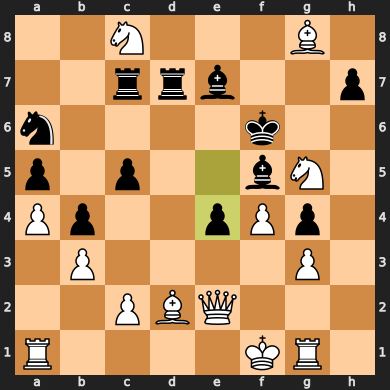




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Nxh7+', 'Nf7', 'Ne6', 'Nxe4+', 'Nh3', 'Nf3', 'Qxa6+', 'Qb5', 'Qxg4', 'Qxe4', 'Qc4', 'Qf3', 'Qe3', 'Qd3', 'Qh2', 'Qg2', 'Qf2', 'Qe1', 'Qd1', 'Bxb4', 'Be3', 'Bc3+', 'Be1', 'Bc1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Ke1', 'Ra3', 'Ra2', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'c3', 'c4']
Opponent played: d7d2


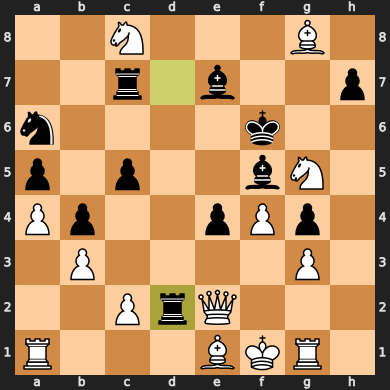




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Nxh7+', 'Nf7', 'Ne6', 'Nxe4+', 'Nh3', 'Nf3', 'Qxa6+', 'Qb5', 'Qxg4', 'Qxe4', 'Qc4', 'Qf3', 'Qe3', 'Qd3', 'Qh2', 'Qg2', 'Qf2', 'Qxd2', 'Qd1', 'Rg2', 'Rh1', 'Kg2', 'Kf2', 'Bf2', 'Bxd2', 'Ra3', 'Ra2', 'Rd1', 'Rc1', 'Rb1', 'c3', 'c4']
Opponent played: e4e3


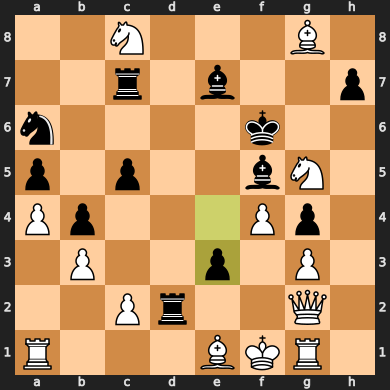




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Nf3', 'Qa8', 'Qb7', 'Qc6+', 'Qd5', 'Qe4', 'Qh3', 'Qf3', 'Qh2', 'Qf2', 'Qe2', 'Qxd2', 'Qh1', 'Rh1', 'Bf2', 'Bxd2', 'Ra3', 'Ra2', 'Rd1', 'Rc1', 'Rb1', 'c3', 'c4']
Opponent played: c7c6


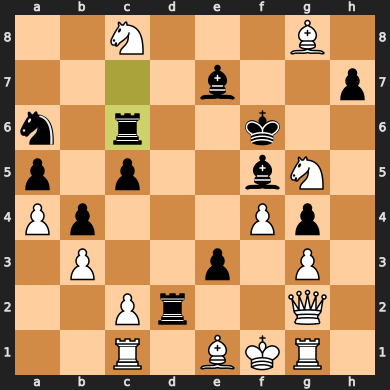




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Nxh7+', 'Nf7', 'Ne6', 'Ne4+', 'Nh3', 'Nf3', 'Qxc6+', 'Qd5', 'Qe4', 'Qh3', 'Qf3', 'Qh2', 'Qf2', 'Qe2', 'Qxd2', 'Qh1', 'Rh1', 'Bf2', 'Bxd2', 'Rd1', 'Rb1', 'Ra1', 'c3', 'c4']
Opponent played: d2d4


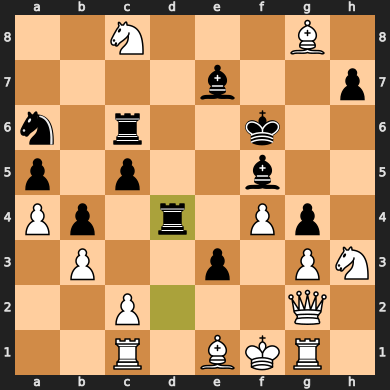




Legal moves
	 ['Bxh7', 'Bf7', 'Be6', 'Bd5', 'Bc4', 'Nxe7', 'Na7', 'Nd6', 'Nb6', 'Ng5', 'Nf2', 'Qxc6+', 'Qd5', 'Qe4', 'Qf3', 'Qh2', 'Qf2', 'Qe2', 'Qd2', 'Qh1', 'Rh1', 'Ke2', 'Bxb4', 'Bc3', 'Bf2', 'Bd2', 'Rd1', 'Rb1', 'Ra1', 'c3', 'c4']
Opponent played: f6g6


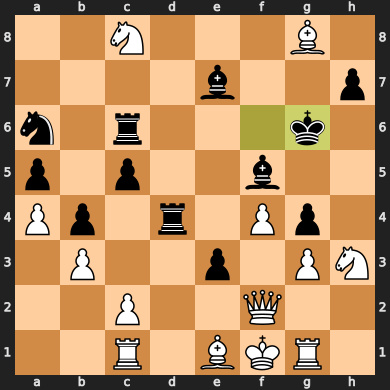




Legal moves
	 ['Bxh7+', 'Bf7+', 'Be6', 'Bd5', 'Bc4', 'Nxe7+', 'Na7', 'Nd6', 'Nb6', 'Ng5', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Rg2', 'Rh1', 'Kg2', 'Ke2', 'Bxb4', 'Bc3', 'Bd2', 'Rd1', 'Rb1', 'Ra1', 'c3', 'c4']
Opponent played: g4h3


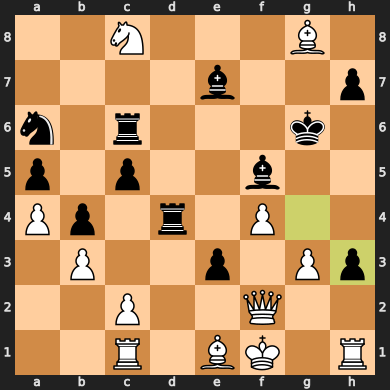




Legal moves
	 ['Bxh7+', 'Bf7+', 'Be6', 'Bd5', 'Bc4', 'Nxe7+', 'Na7', 'Nd6', 'Nb6', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Qg1', 'Rxh3', 'Rh2', 'Rg1', 'Ke2', 'Kg1', 'Bxb4', 'Bc3', 'Bd2', 'Rd1', 'Rb1', 'Ra1', 'g4', 'c3', 'c4']
Opponent played: d4d1


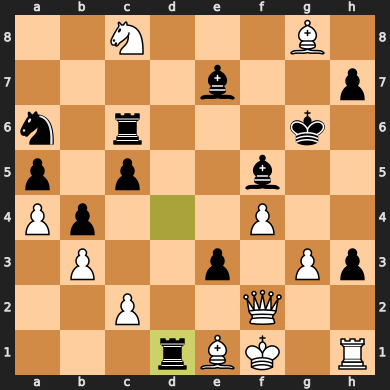




Legal moves
	 ['Bxh7+', 'Bf7+', 'Be6', 'Bd5', 'Bc4', 'Nxe7+', 'Na7', 'Nd6', 'Nb6', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Qg1', 'Rxh3', 'Rh2', 'Rg1', 'Ke2', 'Kg1', 'g4', 'c3', 'c4']
Opponent played: f5g4


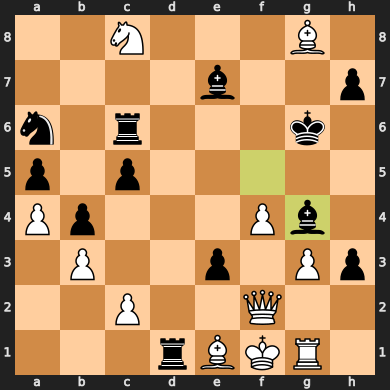




Legal moves
	 ['Bxh7+', 'Bf7+', 'Be6', 'Bd5', 'Bc4', 'Nxe7+', 'Na7', 'Nd6', 'Nb6', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Rg2', 'Rh1', 'f5+', 'c3', 'c4']
Opponent played: g6g7


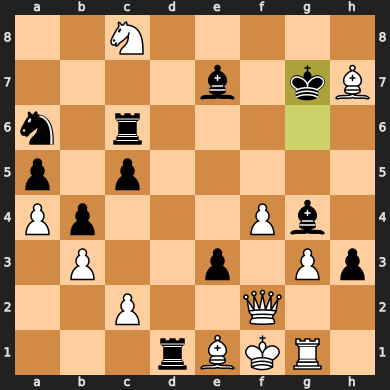




Legal moves
	 ['Nxe7', 'Na7', 'Nd6', 'Nb6', 'Bg8', 'Bg6', 'Bf5', 'Be4', 'Bd3', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Rg2', 'Rh1', 'f5', 'c3', 'c4']
Opponent played: e7f8


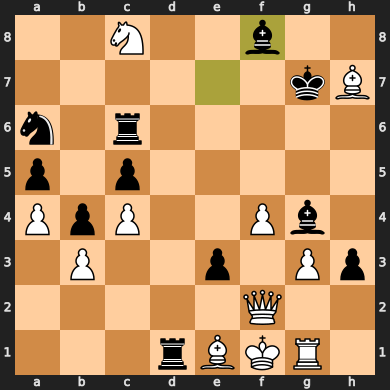




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bg8', 'Bg6', 'Bf5', 'Be4', 'Bd3', 'Bc2', 'Bb1', 'Qf3', 'Qxe3', 'Qh2', 'Qg2', 'Qe2', 'Qd2', 'Qc2', 'Qb2+', 'Qa2', 'Rg2', 'Rh1', 'f5']
Opponent played: d1d2


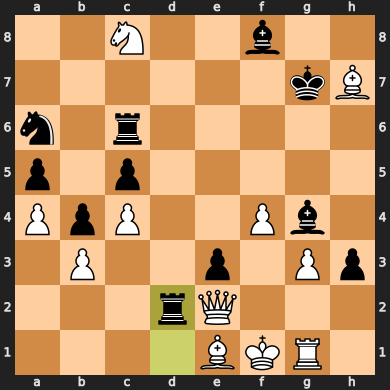




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bg8', 'Bg6', 'Bf5', 'Be4', 'Bd3', 'Bc2', 'Bb1', 'Qxg4+', 'Qf3', 'Qxe3', 'Qd3', 'Qh2', 'Qg2', 'Qf2', 'Qxd2', 'Qd1', 'Rg2', 'Rh1', 'Bf2', 'Bxd2', 'f5']
Opponent played: g7f7


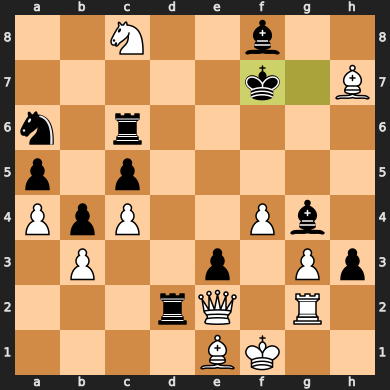




Legal moves
	 ['Ne7', 'Na7', 'Nd6+', 'Nb6', 'Bg8+', 'Bg6+', 'Bf5', 'Be4', 'Bd3', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Rg1', 'Qxg4', 'Qf3', 'Qxe3', 'Qd3', 'Qf2', 'Qxd2', 'Qd1', 'Kg1', 'Bf2', 'Bxd2', 'f5']
Opponent played: f7f6


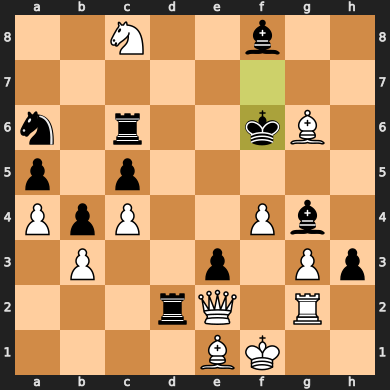




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Be8', 'Bh7', 'Bf7', 'Bh5', 'Bf5', 'Be4', 'Bd3', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Rg1', 'Qxg4', 'Qf3', 'Qxe3', 'Qd3', 'Qf2', 'Qxd2', 'Qd1', 'Kg1', 'Bf2', 'Bxd2', 'f5']
Opponent played: d2c2


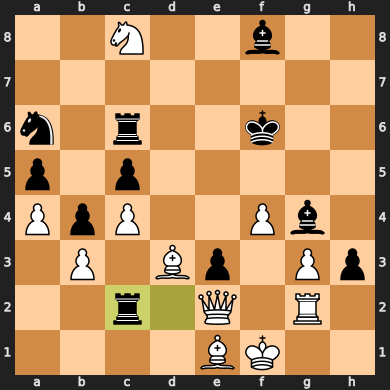




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh7', 'Bg6', 'Bf5', 'Be4', 'Bxc2', 'Rh2', 'Rf2', 'Rg1', 'Qxg4', 'Qf3', 'Qxe3', 'Qf2', 'Qd2', 'Qxc2', 'Qd1', 'Kg1', 'Bxb4', 'Bc3+', 'Bf2', 'Bd2', 'f5']
Opponent played: g4f3


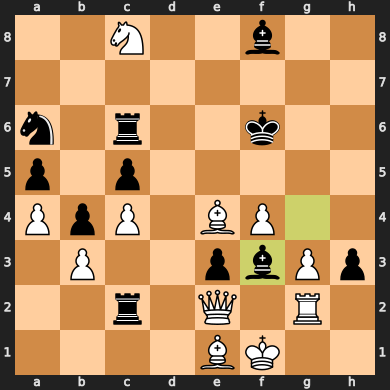




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh7', 'Bg6', 'Bxc6', 'Bf5', 'Bd5', 'Bxf3', 'Bd3', 'Bxc2', 'Rh2', 'Rf2', 'Rg1', 'Qxf3', 'Qxe3', 'Qd3', 'Qf2', 'Qd2', 'Qxc2', 'Qd1', 'Kg1', 'Bxb4', 'Bc3+', 'Bf2', 'Bd2', 'f5', 'g4']
Opponent played: f3e2


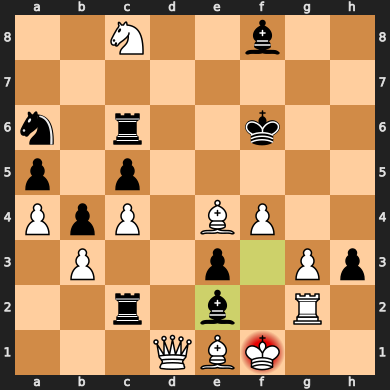




Legal moves
	 ['Kg1', 'Rxe2', 'Qxe2']
Opponent played: f6e6


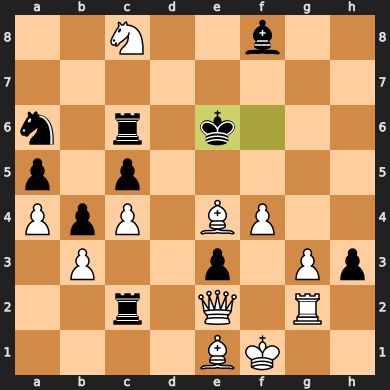




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh7', 'Bg6', 'Bxc6', 'Bf5+', 'Bd5+', 'Bf3', 'Bd3', 'Bxc2', 'Rh2', 'Rf2', 'Rg1', 'Qh5', 'Qg4+', 'Qf3', 'Qxe3', 'Qd3', 'Qf2', 'Qd2', 'Qxc2', 'Qd1', 'Kg1', 'Bxb4', 'Bc3', 'Bf2', 'Bd2', 'f5+', 'g4']
Opponent played: c6d6


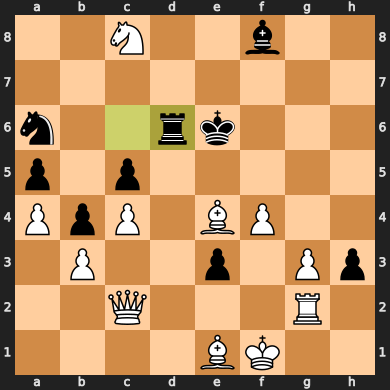




Legal moves
	 ['Ne7', 'Na7', 'Nxd6', 'Nb6', 'Ba8', 'Bh7', 'Bb7', 'Bg6', 'Bc6', 'Bf5+', 'Bd5+', 'Bf3', 'Bd3', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rg1', 'Qd3', 'Qc3', 'Qf2', 'Qe2', 'Qd2', 'Qb2', 'Qa2', 'Qd1', 'Qc1', 'Qb1', 'Ke2', 'Kg1', 'Bxb4', 'Bc3', 'Bf2', 'Bd2', 'f5+', 'g4']
Opponent played: e6d7


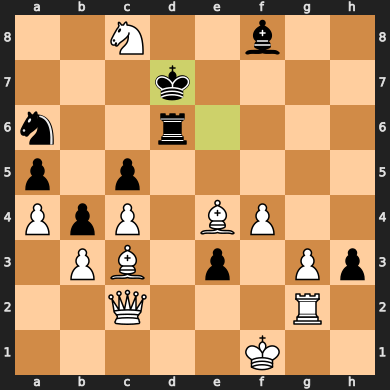




Legal moves
	 ['Ne7', 'Na7', 'Nxd6', 'Nb6+', 'Ba8', 'Bh7', 'Bb7', 'Bg6', 'Bc6+', 'Bf5+', 'Bd5', 'Bf3', 'Bd3', 'Bh8', 'Bg7', 'Bf6', 'Be5', 'Bd4', 'Bxb4', 'Bd2', 'Bb2', 'Be1', 'Ba1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rg1', 'Qd3', 'Qf2', 'Qe2', 'Qd2', 'Qb2', 'Qa2', 'Qd1', 'Qc1', 'Qb1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: d7d8


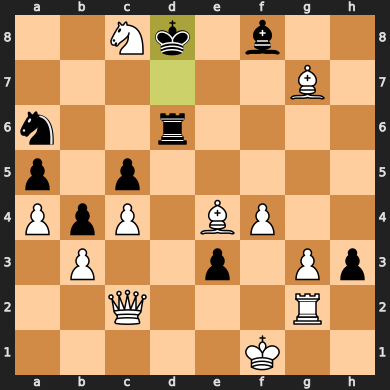




Legal moves
	 ['Ne7', 'Na7', 'Nxd6', 'Nb6', 'Bh8', 'Bxf8', 'Bh6', 'Bf6+', 'Be5', 'Bd4', 'Bc3', 'Bb2', 'Ba1', 'Ba8', 'Bh7', 'Bb7', 'Bg6', 'Bc6', 'Bf5', 'Bd5', 'Bf3', 'Bd3', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rg1', 'Qd3', 'Qc3', 'Qf2', 'Qe2', 'Qd2', 'Qb2', 'Qa2', 'Qd1', 'Qc1', 'Qb1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: d6f6


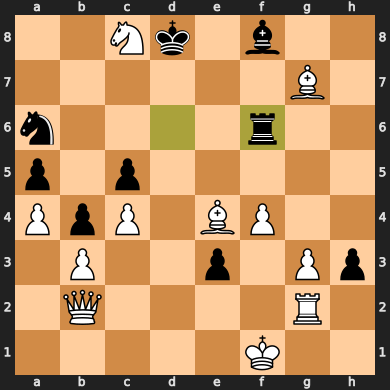




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh8', 'Bxf8', 'Bh6', 'Bxf6+', 'Ba8', 'Bh7', 'Bb7', 'Bg6', 'Bc6', 'Bf5', 'Bd5', 'Bf3', 'Bd3', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Re2', 'Rd2+', 'Rc2', 'Rg1', 'Qxf6+', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qf2', 'Qe2', 'Qd2+', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: f6f7


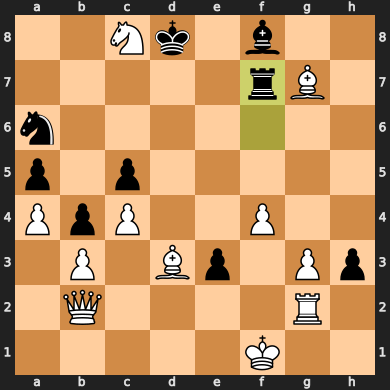




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh8', 'Bxf8', 'Bh6', 'Bf6+', 'Be5', 'Bd4', 'Bc3', 'Bh7', 'Bg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rg1', 'Qf6+', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qf2', 'Qe2', 'Qd2', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: f7g7


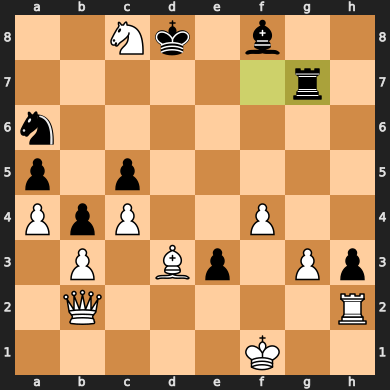




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bh7', 'Bg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rxh3', 'Rg2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rh1', 'Qxg7', 'Qf6+', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qg2', 'Qf2', 'Qe2', 'Qd2', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: g7g5


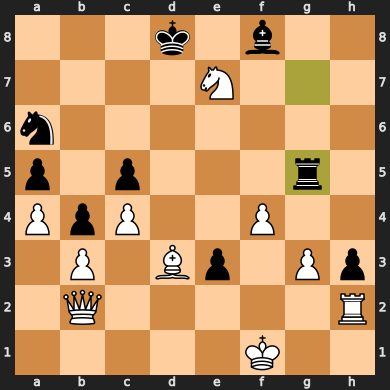




Legal moves
	 ['Ng8', 'Nc8', 'Ng6', 'Nc6+', 'Nf5', 'Nd5', 'Bh7', 'Bg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rxh3', 'Rg2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rh1', 'Qh8', 'Qg7', 'Qf6', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qg2', 'Qf2', 'Qe2', 'Qd2', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'Ke2', 'Kg1', 'Ke1', 'fxg5', 'f5', 'g4']
Opponent played: d8c7


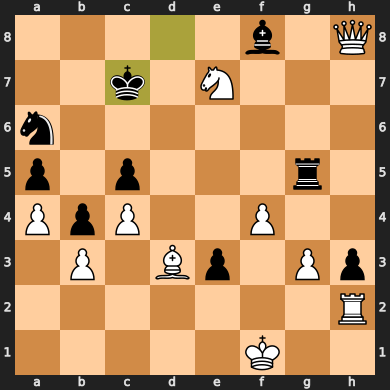




Legal moves
	 ['Qg8', 'Qxf8', 'Qh7', 'Qg7', 'Qh6', 'Qf6', 'Qh5', 'Qe5+', 'Qh4', 'Qd4', 'Qxh3', 'Qc3', 'Qb2', 'Qa1', 'Ng8', 'Nc8', 'Ng6', 'Nc6', 'Nf5', 'Nd5+', 'Bh7', 'Bg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rxh3', 'Rg2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rh1', 'Ke2', 'Kg1', 'Ke1', 'fxg5', 'f5', 'g4']
Opponent played: g5g6


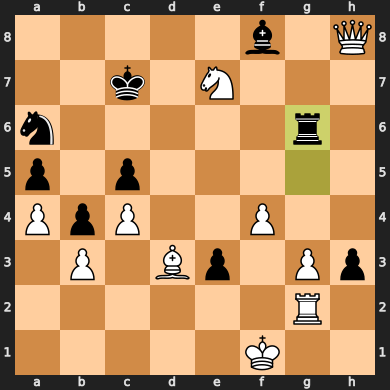




Legal moves
	 ['Qg8', 'Qxf8', 'Qh7', 'Qg7', 'Qh6', 'Qf6', 'Qh5', 'Qe5+', 'Qh4', 'Qd4', 'Qxh3', 'Qc3', 'Qb2', 'Qa1', 'Ng8', 'Nc8', 'Nxg6', 'Nc6', 'Nf5', 'Nd5+', 'Bxg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rg1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: c7d6


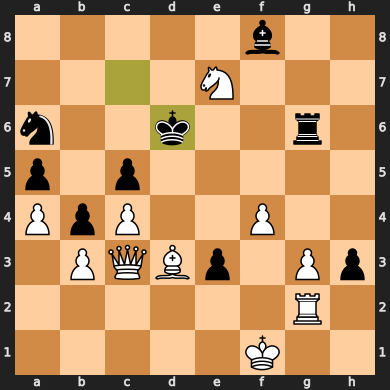




Legal moves
	 ['Ng8', 'Nc8+', 'Nxg6', 'Nc6', 'Nf5+', 'Nd5', 'Bxg6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Qh8', 'Qg7', 'Qf6+', 'Qe5+', 'Qd4+', 'Qxb4', 'Qd2', 'Qc2', 'Qb2', 'Qe1', 'Qc1', 'Qa1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rg1', 'Ke2', 'Kg1', 'Ke1', 'f5', 'g4']
Opponent played: f8g7


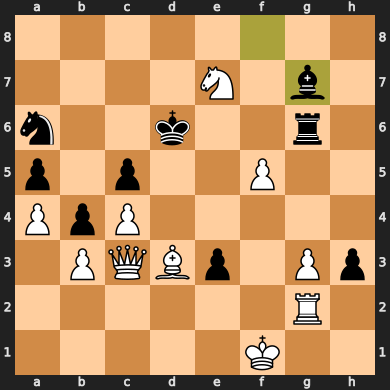




Legal moves
	 ['Ng8', 'Nc8+', 'Nxg6', 'Nc6', 'Nd5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Qxg7', 'Qf6+', 'Qe5+', 'Qd4+', 'Qxb4', 'Qd2', 'Qc2', 'Qb2', 'Qe1', 'Qc1', 'Qa1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rg1', 'Ke2', 'Kg1', 'Ke1', 'fxg6', 'f6', 'g4']
Opponent played: g7h6


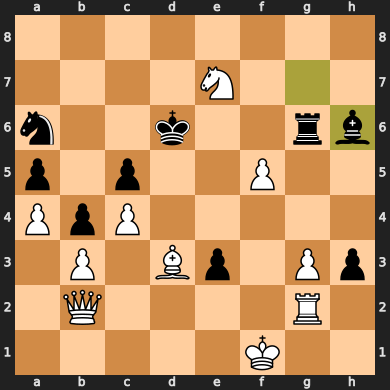




Legal moves
	 ['Ng8', 'Nc8+', 'Nxg6', 'Nc6', 'Nd5', 'Be4', 'Be2', 'Bc2', 'Bb1', 'Rh2', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rg1', 'Qh8', 'Qg7', 'Qf6+', 'Qe5+', 'Qd4+', 'Qc3', 'Qa3', 'Qf2', 'Qe2', 'Qd2', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'Ke2', 'Kg1', 'Ke1', 'fxg6', 'f6', 'g4']
Opponent played: e3e2


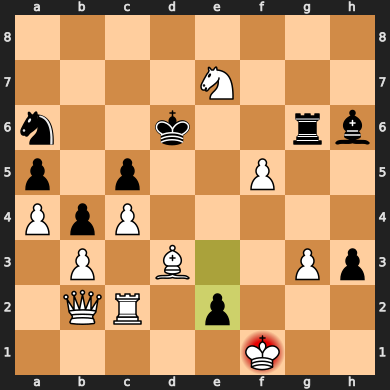




Legal moves
	 ['Kf2', 'Kxe2', 'Kg1', 'Ke1', 'Bxe2', 'Rxe2']
Opponent played: a6b8


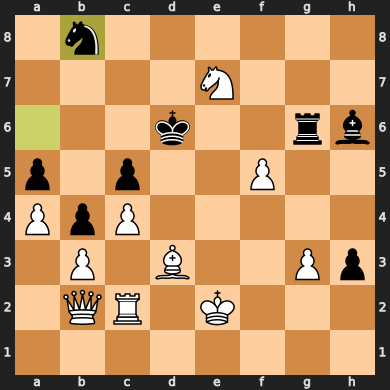




Legal moves
	 ['Ng8', 'Nc8+', 'Nxg6', 'Nc6', 'Nd5', 'Be4', 'Kf3', 'Kf2', 'Kf1', 'Ke1', 'Kd1', 'Rc3', 'Rd2', 'Rc1', 'Qh8', 'Qg7', 'Qf6+', 'Qe5+', 'Qd4+', 'Qc3', 'Qa3', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'fxg6', 'f6', 'g4']
Opponent played: d6d7


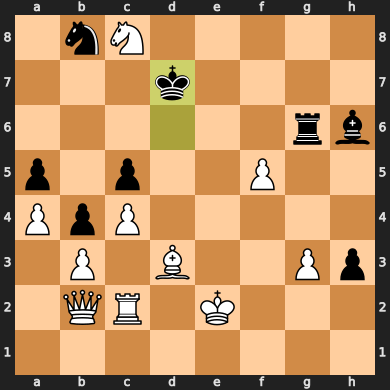




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Be4', 'Kf3', 'Kf2', 'Kf1', 'Ke1', 'Kd1', 'Rc3', 'Rd2', 'Rc1', 'Qh8', 'Qg7+', 'Qf6', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'fxg6', 'f6', 'g4']
Opponent played: h3h2


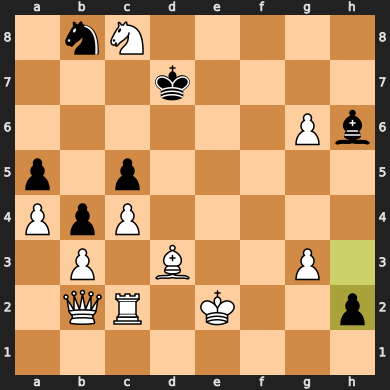




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Bf5+', 'Be4', 'Kf3', 'Kf2', 'Kf1', 'Ke1', 'Kd1', 'Rc3', 'Rd2', 'Rc1', 'Qh8', 'Qg7+', 'Qf6', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'g7', 'g4']
Opponent played: h2h1q


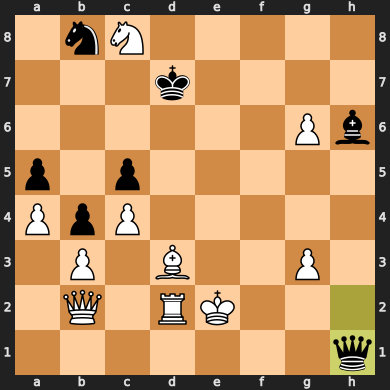




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Bf5+', 'Be4+', 'Bc2+', 'Bb1+', 'Kf2', 'Rc2', 'Rd1', 'Qh8', 'Qg7+', 'Qf6', 'Qe5', 'Qd4+', 'Qc3', 'Qa3', 'Qc2', 'Qa2', 'Qc1', 'Qb1', 'Qa1', 'g7', 'g4']
Opponent played: h6f8


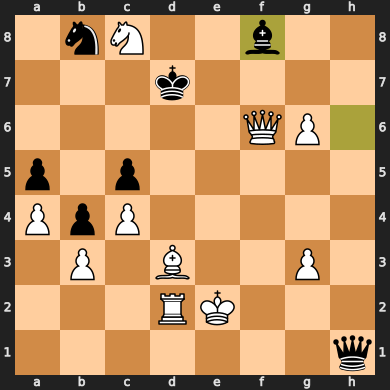




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Qh8', 'Qxf8', 'Qd8+', 'Qg7+', 'Qf7+', 'Qe7+', 'Qe6+', 'Qd6+', 'Qc6+', 'Qb6', 'Qa6', 'Qg5', 'Qf5+', 'Qe5', 'Qh4', 'Qf4', 'Qd4+', 'Qf3', 'Qc3', 'Qf2', 'Qb2', 'Qf1', 'Qa1', 'Bf5+', 'Be4+', 'Bc2+', 'Bb1+', 'Ke3', 'Kf2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'g7', 'g4']
Opponent played: h1h5


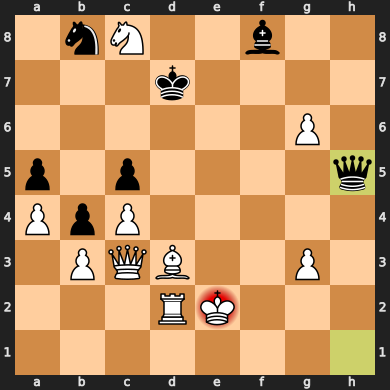




Legal moves
	 ['Ke3', 'Kf2', 'Kf1', 'Ke1', 'g4']
Opponent played: h5h4


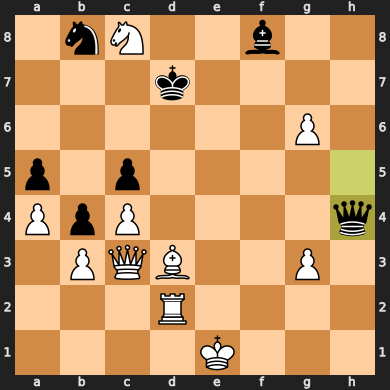




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Bf5+', 'Be4+', 'Be2+', 'Bc2+', 'Bf1+', 'Bb1+', 'Qh8', 'Qg7+', 'Qf6', 'Qe5', 'Qd4+', 'Qxb4', 'Qc2', 'Qb2', 'Qc1', 'Qa1', 'Rh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf2', 'Ke2', 'Kf1', 'Kd1', 'gxh4', 'g7']
Opponent played: h4h3


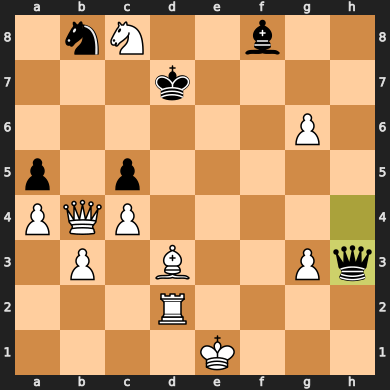




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Qxb8', 'Qb7+', 'Qb6', 'Qxc5', 'Qb5+', 'Qxa5', 'Qc3', 'Qa3', 'Bf5+', 'Be4+', 'Be2+', 'Bc2+', 'Bf1+', 'Bb1+', 'Rh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf2', 'Ke2', 'Kd1', 'g7', 'g4']
Opponent played: h3h2


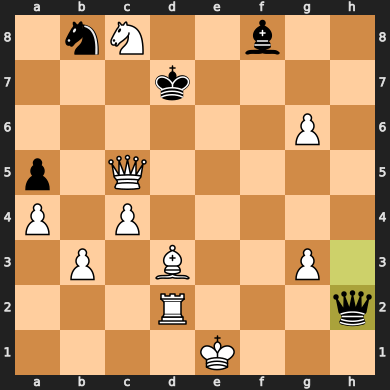




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6+', 'Qxf8', 'Qe7+', 'Qc7+', 'Qa7+', 'Qd6+', 'Qc6+', 'Qb6', 'Qh5', 'Qg5', 'Qf5+', 'Qe5', 'Qd5+', 'Qb5+', 'Qxa5', 'Qd4+', 'Qb4', 'Qe3', 'Qa3', 'Qf2', 'Qg1', 'Bf5+', 'Be4+', 'Be2+', 'Bc2+', 'Bf1+', 'Bb1+', 'Rxh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf1', 'Kd1', 'g7', 'g4', 'b4']
Opponent played: d7c7


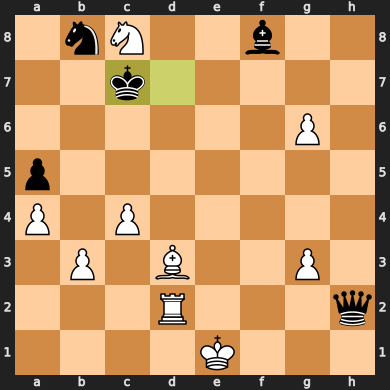




Legal moves
	 ['Ne7', 'Na7', 'Nd6', 'Nb6', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bf1', 'Bb1', 'Rxh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf1', 'Kd1', 'g7', 'c5', 'g4', 'b4']
Opponent played: f8g7


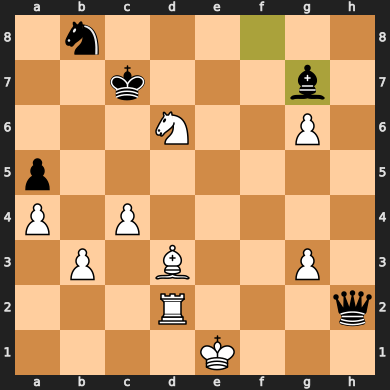




Legal moves
	 ['Ne8+', 'Nc8', 'Nf7', 'Nb7', 'Nf5', 'Nb5+', 'Ne4', 'Bf5', 'Be4', 'Be2', 'Bc2', 'Bf1', 'Bb1', 'Rxh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf1', 'Kd1', 'c5', 'g4', 'b4']
Opponent played: c7d6


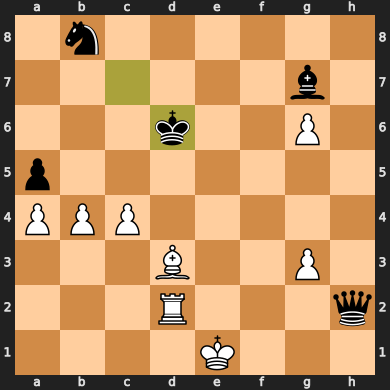




Legal moves
	 ['Bf5+', 'Be4+', 'Be2+', 'Bc2+', 'Bf1+', 'Bb1+', 'Rxh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf1', 'Kd1', 'bxa5', 'c5+', 'b5', 'g4']
Opponent played: d6e5


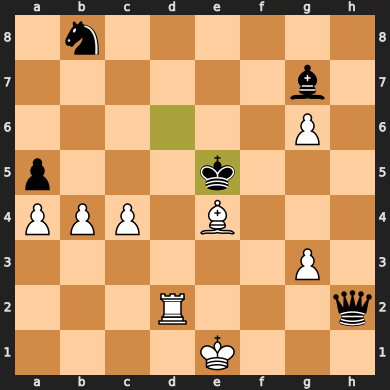




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bf5', 'Bd5', 'Bf3', 'Bd3', 'Bg2', 'Bc2', 'Bh1', 'Bb1', 'Rd8', 'Rd7', 'Rd6', 'Rd5+', 'Rd4', 'Rd3', 'Rxh2', 'Rg2', 'Rf2', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kf1', 'Kd1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: h2a2


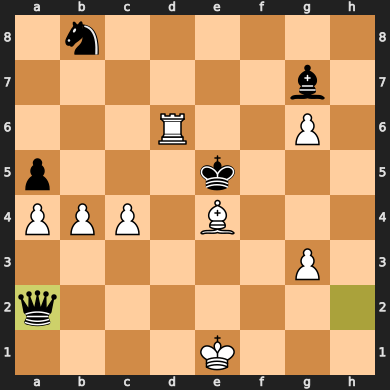




Legal moves
	 ['Rd8', 'Rd7', 'Rf6', 'Re6+', 'Rc6', 'Rb6', 'Ra6', 'Rd5+', 'Rd4', 'Rd3', 'Rd2', 'Rd1', 'Ba8', 'Bb7', 'Bc6', 'Bf5', 'Bd5', 'Bf3', 'Bd3', 'Bg2', 'Bc2', 'Bh1', 'Bb1', 'Kf1', 'Kd1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: b8d7


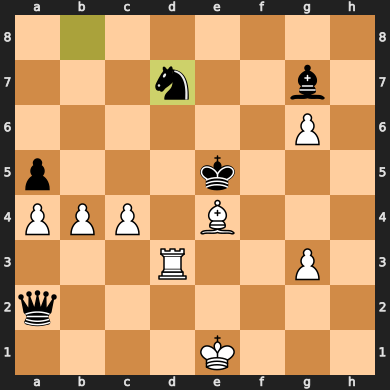




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bf5', 'Bd5', 'Bf3', 'Bg2', 'Bh1', 'Rxd7', 'Rd6', 'Rd5+', 'Rd4', 'Rf3', 'Re3', 'Rc3', 'Rb3', 'Ra3', 'Rd2', 'Rd1', 'Kf1', 'Kd1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: a2g2


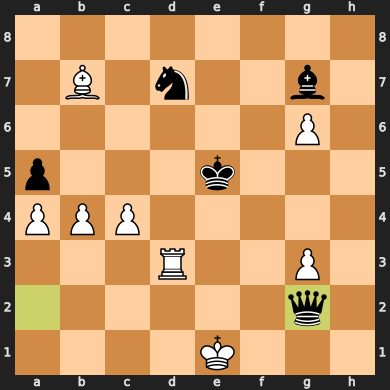




Legal moves
	 ['Bc8', 'Ba8', 'Bc6', 'Ba6', 'Bd5', 'Be4', 'Bf3', 'Bxg2', 'Rxd7', 'Rd6', 'Rd5+', 'Rd4', 'Rf3', 'Re3+', 'Rc3', 'Rb3', 'Ra3', 'Rd2', 'Rd1', 'Kd1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: d7f8


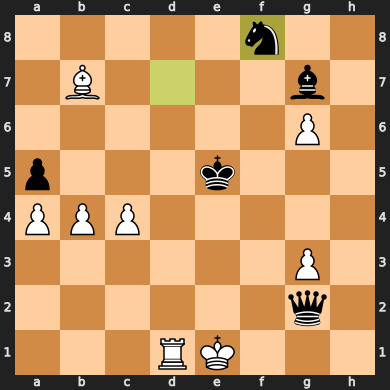




Legal moves
	 ['Bc8', 'Ba8', 'Bc6', 'Ba6', 'Bd5', 'Be4', 'Bf3', 'Bxg2', 'Rd8', 'Rd7', 'Rd6', 'Rd5+', 'Rd4', 'Rd3', 'Rd2', 'Rc1', 'Rb1', 'Ra1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: g2c6


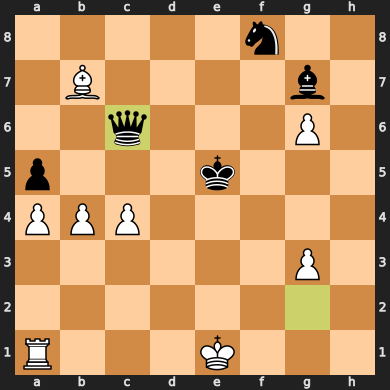




Legal moves
	 ['Bc8', 'Ba8', 'Bxc6', 'Ba6', 'Kf2', 'Ke2', 'Kd2', 'Kf1', 'Kd1', 'Ra3', 'Ra2', 'Rd1', 'Rc1', 'Rb1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: c6e8


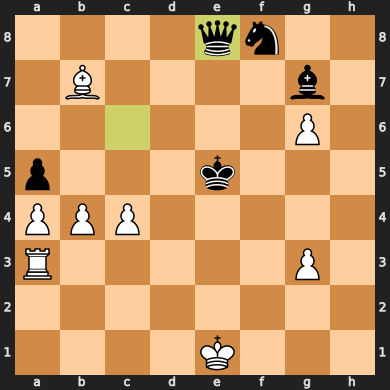




Legal moves
	 ['Bc8', 'Ba8', 'Bc6', 'Ba6', 'Bd5', 'Be4', 'Bf3', 'Bg2', 'Bh1', 'Rf3', 'Re3+', 'Rd3', 'Rc3', 'Rb3', 'Ra2', 'Ra1', 'Kf2', 'Ke2', 'Kd2', 'Kf1', 'Kd1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: e5d6


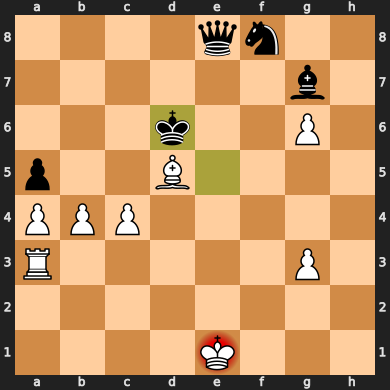




Legal moves
	 ['Kf2', 'Kd2', 'Kf1', 'Kd1', 'Be6', 'Be4', 'Re3']
Opponent played: e8e6


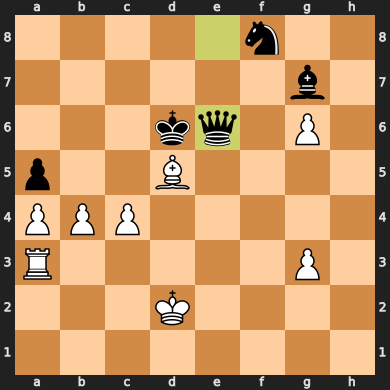




Legal moves
	 ['Ba8', 'Bb7', 'Bxe6', 'Bc6', 'Be4', 'Bf3', 'Bg2', 'Bh1', 'Rf3', 'Re3', 'Rd3', 'Rc3', 'Rb3', 'Ra2', 'Ra1', 'Kd3', 'Kc2', 'Kd1', 'Kc1', 'bxa5', 'c5+', 'b5', 'g4']
Opponent played: d6e7


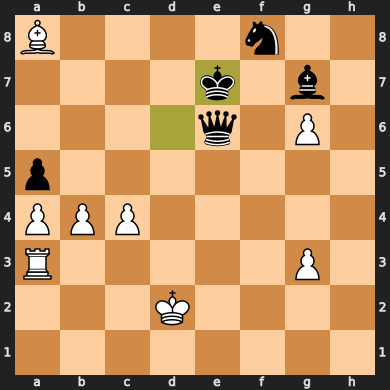




Legal moves
	 ['Bb7', 'Bc6', 'Bd5', 'Be4', 'Bf3', 'Bg2', 'Bh1', 'Rf3', 'Re3', 'Rd3', 'Rc3', 'Rb3', 'Ra2', 'Ra1', 'Kd3', 'Kc2', 'Kd1', 'Kc1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: f8d7


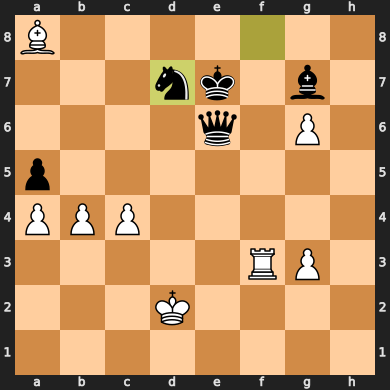




Legal moves
	 ['Bb7', 'Bc6', 'Bd5', 'Be4', 'Rf8', 'Rf7+', 'Rf6', 'Rf5', 'Rf4', 'Re3', 'Rd3', 'Rc3', 'Rb3', 'Ra3', 'Rf2', 'Rf1', 'Kd3', 'Kc2', 'Kd1', 'Kc1', 'bxa5', 'c5', 'b5', 'g4']
Opponent played: e7d6


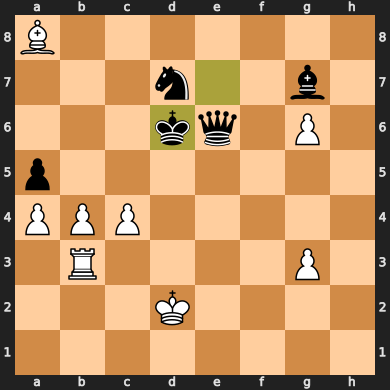




Legal moves
	 ['Bb7', 'Bc6', 'Bd5', 'Be4', 'Bf3', 'Bg2', 'Bh1', 'Rf3', 'Re3', 'Rd3+', 'Rc3', 'Ra3', 'Rb2', 'Rb1', 'Kd3', 'Kc2', 'Kd1', 'Kc1', 'bxa5', 'c5+', 'b5', 'g4']
Opponent played: e6e8


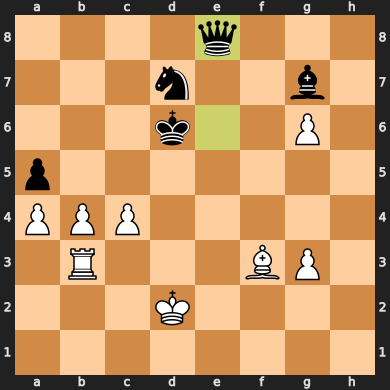




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bh5', 'Bd5', 'Bg4', 'Be4', 'Bg2', 'Be2', 'Bh1', 'Bd1', 'Re3', 'Rd3+', 'Rc3', 'Ra3', 'Rb2', 'Rb1', 'Kd3', 'Kc2', 'Kd1', 'Kc1', 'bxa5', 'c5+', 'b5', 'g4']
Opponent played: g7c3


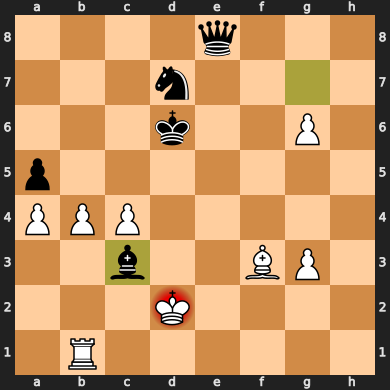




Legal moves
	 ['Kd3', 'Kxc3', 'Kc2', 'Kd1', 'Kc1']
Opponent played: d7f6


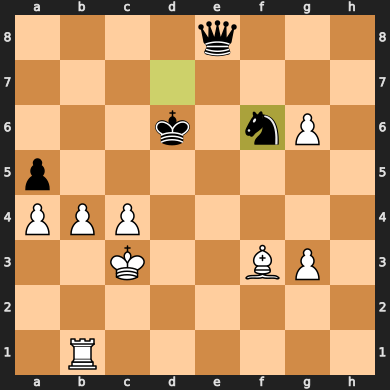




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bh5', 'Bd5', 'Bg4', 'Be4', 'Bg2', 'Be2', 'Bh1', 'Bd1', 'Kd4', 'Kd3', 'Kb3', 'Kd2', 'Kc2', 'Kb2', 'Rb3', 'Rb2', 'Rh1', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Ra1', 'bxa5', 'g7', 'c5+', 'b5', 'g4']
Opponent played: e8f8


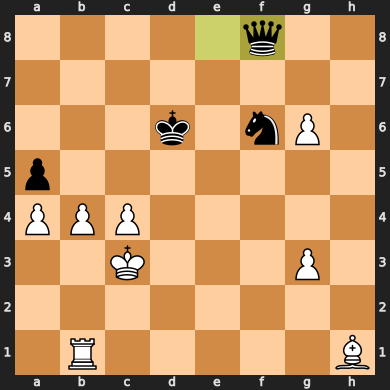




Legal moves
	 ['Kd4', 'Kd3', 'Kb3', 'Kd2', 'Kc2', 'Kb2', 'Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bf3', 'Bg2', 'Rb3', 'Rb2', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Ra1', 'bxa5', 'g7', 'c5+', 'b5', 'g4']
Opponent played: f8a8


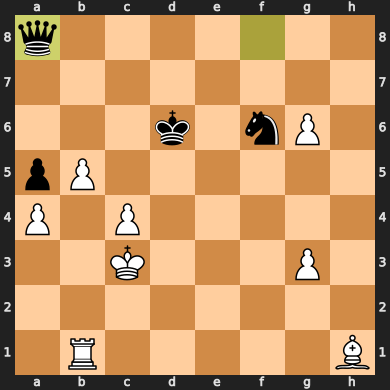




Legal moves
	 ['Kd4', 'Kd3', 'Kb3', 'Kd2', 'Kc2', 'Kb2', 'Bxa8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bf3', 'Bg2', 'Rb4', 'Rb3', 'Rb2', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Ra1', 'g7', 'b6', 'c5+', 'g4']
Opponent played: a8f3


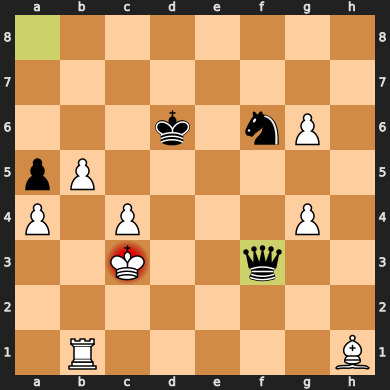




Legal moves
	 ['Kd4', 'Kd2', 'Kc2', 'Kb2', 'Bxf3']
Opponent played: f6h7


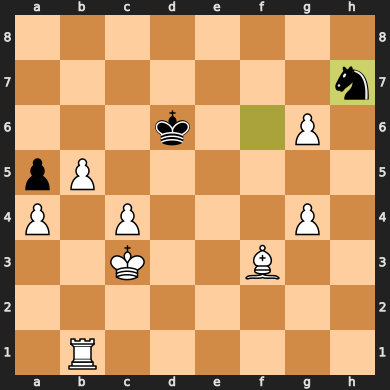




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bg2', 'Be2', 'Bh1', 'Bd1', 'Kd4', 'Kd3', 'Kb3', 'Kd2', 'Kc2', 'Kb2', 'Rb4', 'Rb3', 'Rb2', 'Rh1', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Ra1', 'gxh7', 'g7', 'b6', 'g5', 'c5+']
Opponent played: d6d7


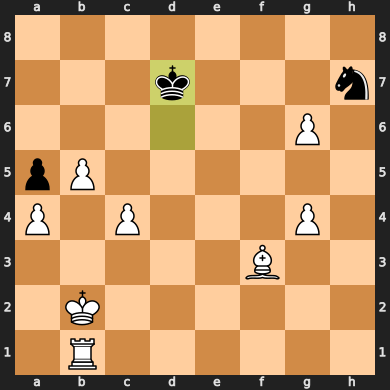




Legal moves
	 ['Ba8', 'Bb7', 'Bc6+', 'Bd5', 'Be4', 'Bg2', 'Be2', 'Bh1', 'Bd1', 'Kc3', 'Kb3', 'Ka3', 'Kc2', 'Ka2', 'Kc1', 'Ka1', 'Rh1', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Ra1', 'gxh7', 'g7', 'b6', 'g5', 'c5']
Opponent played: h7g5


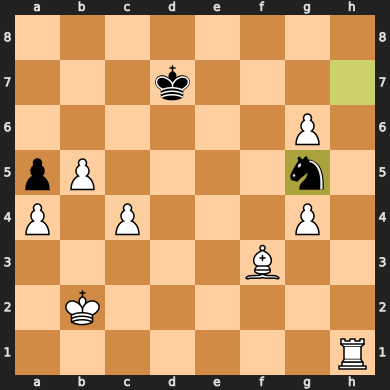




Legal moves
	 ['Ba8', 'Bb7', 'Bc6+', 'Bd5', 'Be4', 'Bg2', 'Be2', 'Bd1', 'Kc3', 'Kb3', 'Ka3', 'Kc2', 'Ka2', 'Kc1', 'Kb1', 'Ka1', 'Rh8', 'Rh7+', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rg1', 'Rf1', 'Re1', 'Rd1+', 'Rc1', 'Rb1', 'Ra1', 'g7', 'b6', 'c5']
Opponent played: d7c7


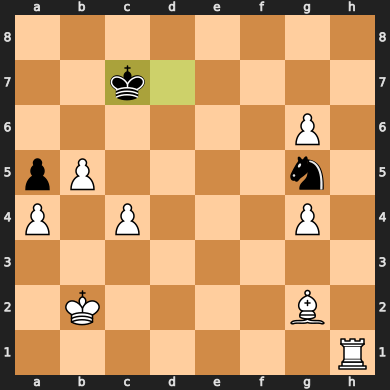




Legal moves
	 ['Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bf1', 'Kc3', 'Kb3', 'Ka3', 'Kc2', 'Ka2', 'Kc1', 'Kb1', 'Ka1', 'Rh8', 'Rh7+', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rg1', 'Rf1', 'Re1', 'Rd1', 'Rc1', 'Rb1', 'Ra1', 'g7', 'b6+', 'c5']
Opponent played: g5f7


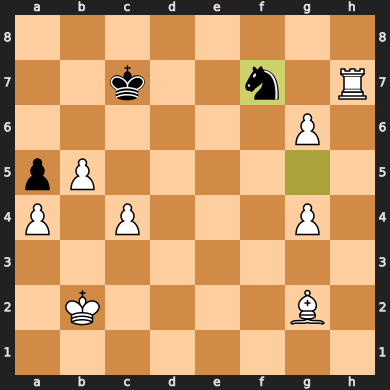




Legal moves
	 ['Rh8', 'Rg7', 'Rxf7+', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rh1', 'Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bh1', 'Bf1', 'Kc3', 'Kb3', 'Ka3', 'Kc2', 'Ka2', 'Kc1', 'Kb1', 'Ka1', 'gxf7', 'g7', 'b6+', 'g5', 'c5']
Opponent played: c7c8


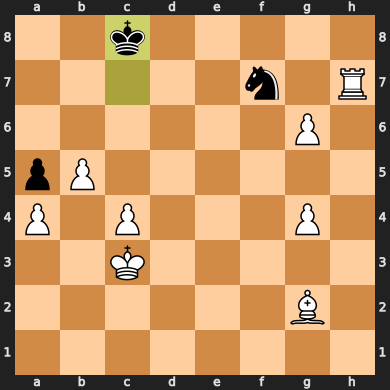




Legal moves
	 ['Rh8+', 'Rg7', 'Rxf7', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rh1', 'Kd4', 'Kd3', 'Kb3', 'Kd2', 'Kc2', 'Kb2', 'Ba8', 'Bb7+', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bh1', 'Bf1', 'gxf7', 'g7', 'b6', 'g5', 'c5']
Opponent played: c8d8


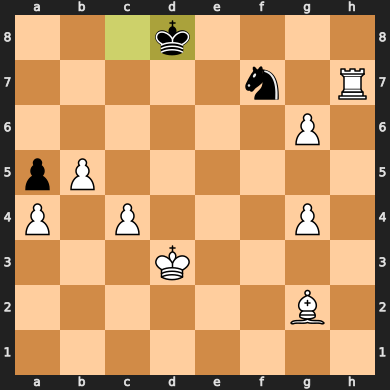




Legal moves
	 ['Rh8+', 'Rg7', 'Rxf7', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rh1', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bh1', 'Bf1', 'gxf7', 'g7', 'b6', 'g5', 'c5']
Opponent played: f7h8


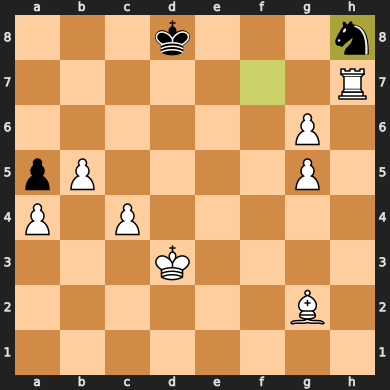




Legal moves
	 ['Rxh8+', 'Rg7', 'Rf7', 'Re7', 'Rd7+', 'Rc7', 'Rb7', 'Ra7', 'Rh6', 'Rh5', 'Rh4', 'Rh3', 'Rh2', 'Rh1', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bh1', 'Bf1', 'g7', 'b6', 'c5']
Opponent played: h8g6


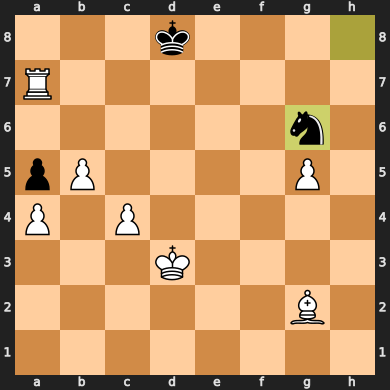




Legal moves
	 ['Ra8+', 'Rh7', 'Rg7', 'Rf7', 'Re7', 'Rd7+', 'Rc7', 'Rb7', 'Ra6', 'Rxa5', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'Ba8', 'Bb7', 'Bc6', 'Bd5', 'Be4', 'Bh3', 'Bf3', 'Bh1', 'Bf1', 'b6', 'c5']
Opponent played: g6f4


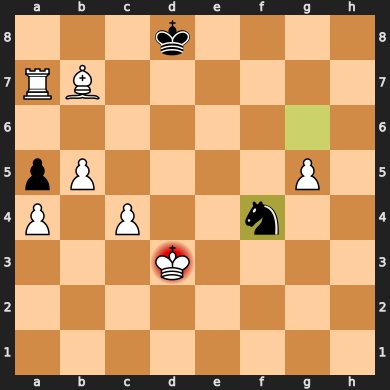




Legal moves
	 ['Ke4', 'Kd4', 'Ke3', 'Kc3', 'Kd2', 'Kc2']
Opponent played: d8c7


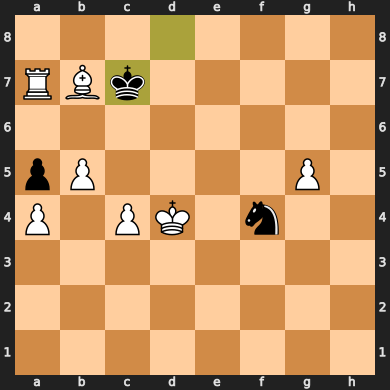




Legal moves
	 ['Bc8+', 'Ba8+', 'Bc6+', 'Ba6+', 'Bd5+', 'Be4+', 'Bf3+', 'Bg2+', 'Bh1+', 'Ra8', 'Ra6', 'Rxa5', 'Ke5', 'Kc5', 'Ke4', 'Ke3', 'Kc3', 'g6', 'b6+', 'c5']
Opponent played: c7d7


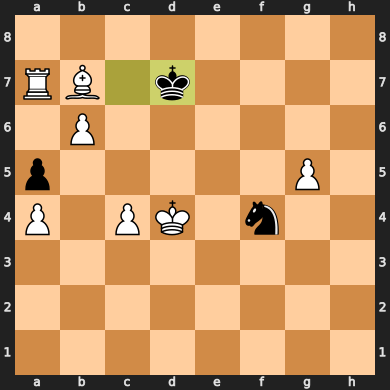




Legal moves
	 ['Bc8+', 'Ba8+', 'Bc6+', 'Ba6+', 'Bd5+', 'Be4+', 'Bf3+', 'Bg2+', 'Bh1+', 'Ra8', 'Ra6', 'Rxa5', 'Ke5', 'Kc5', 'Ke4', 'Ke3', 'Kc3', 'g6', 'c5']
Opponent played: d7e8


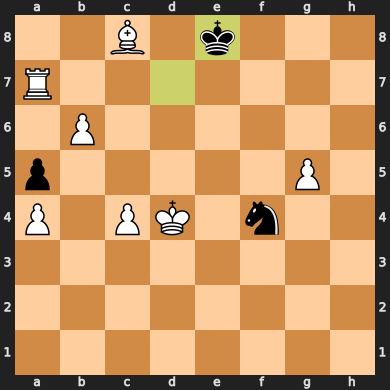




Legal moves
	 ['Bd7+', 'Bb7', 'Be6', 'Ba6', 'Bf5', 'Bg4', 'Bh3', 'Ra8', 'Rh7', 'Rg7', 'Rf7', 'Re7+', 'Rd7', 'Rc7', 'Rb7', 'Ra6', 'Rxa5', 'Ke5', 'Kc5', 'Ke4', 'Ke3', 'Kc3', 'b7', 'g6', 'c5']
Opponent played: f4g6


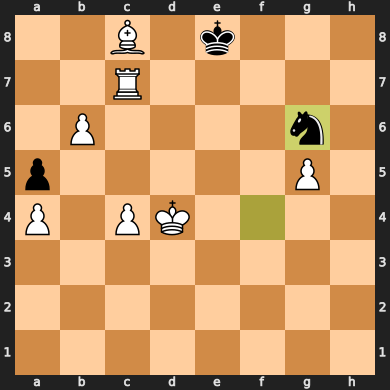




Legal moves
	 ['Bd7+', 'Bb7', 'Be6', 'Ba6', 'Bf5', 'Bg4', 'Bh3', 'Rh7', 'Rg7', 'Rf7', 'Re7+', 'Rd7', 'Rb7', 'Ra7', 'Rc6', 'Rc5', 'Kd5', 'Kc5', 'Ke4', 'Ke3', 'Kd3', 'Kc3', 'b7', 'c5']
Opponent played: g6h4


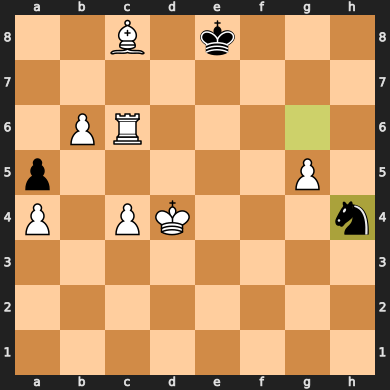




Legal moves
	 ['Bd7+', 'Bb7', 'Be6', 'Ba6', 'Bf5', 'Bg4', 'Bh3', 'Rc7', 'Rh6', 'Rg6', 'Rf6', 'Re6+', 'Rd6', 'Rc5', 'Ke5', 'Kd5', 'Kc5', 'Ke4', 'Ke3', 'Kd3', 'Kc3', 'b7', 'g6', 'c5']
Opponent played: e8f8


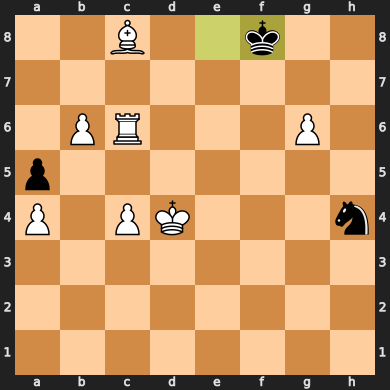




Legal moves
	 ['Bd7', 'Bb7', 'Be6', 'Ba6', 'Bf5', 'Bg4', 'Bh3', 'Rc7', 'Rf6+', 'Re6', 'Rd6', 'Rc5', 'Ke5', 'Kd5', 'Kc5', 'Ke4', 'Ke3', 'Kd3', 'Kc3', 'g7+', 'b7', 'c5']
Opponent played: h4f5


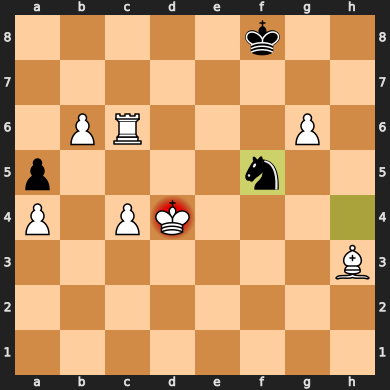




Legal moves
	 ['Ke5', 'Kd5', 'Kc5', 'Ke4', 'Kd3', 'Kc3', 'Bxf5']
Opponent played: f5d6


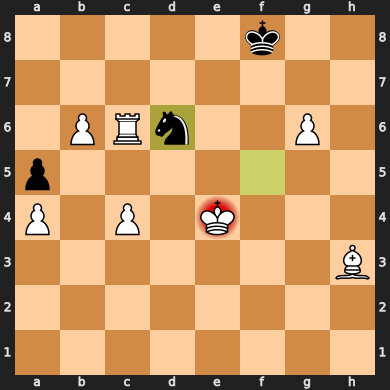




Legal moves
	 ['Ke5', 'Kd5', 'Kf4', 'Kd4', 'Kf3', 'Ke3', 'Kd3', 'Rxd6']
Opponent played: d6c4


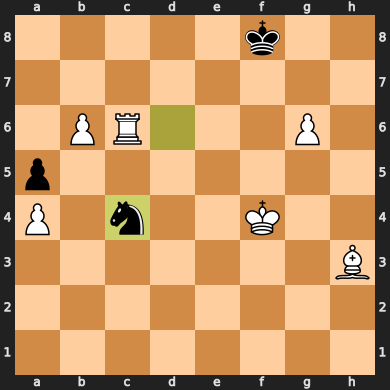




Legal moves
	 ['Rc8+', 'Rc7', 'Rf6+', 'Re6', 'Rd6', 'Rc5', 'Rxc4', 'Kg5', 'Kf5', 'Kg4', 'Ke4', 'Kg3', 'Kf3', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'g7+', 'b7']
Opponent played: c4b6


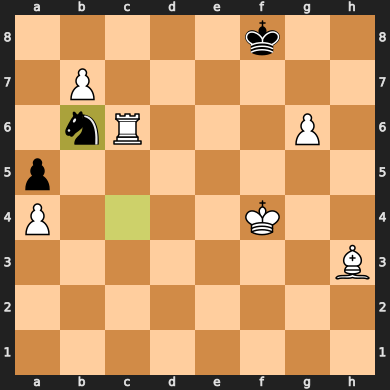




Legal moves
	 ['Rc8+', 'Rc7', 'Rf6+', 'Re6', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Kg5', 'Kf5', 'Ke5', 'Kg4', 'Ke4', 'Kg3', 'Kf3', 'Ke3', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'b8=Q+', 'b8=R+', 'b8=B', 'b8=N', 'g7+']
Opponent played: f8e7


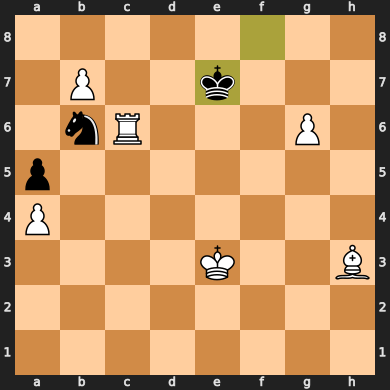




Legal moves
	 ['Rc8', 'Rc7+', 'Rf6', 'Re6+', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kf4', 'Ke4', 'Kd4', 'Kf3', 'Kd3', 'Kf2', 'Ke2', 'Kd2', 'b8=Q', 'b8=R', 'b8=B', 'b8=N', 'g7']
Opponent played: b6c8


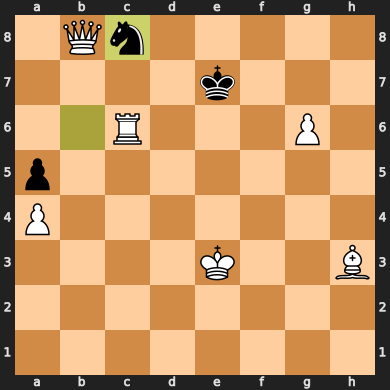




Legal moves
	 ['Qxc8', 'Qa8', 'Qc7+', 'Qb7+', 'Qa7+', 'Qd6+', 'Qb6', 'Qe5+', 'Qb5', 'Qf4', 'Qb4+', 'Qg3', 'Qb3', 'Qh2', 'Qb2', 'Qb1', 'Rxc8', 'Rc7+', 'Rf6', 'Re6+', 'Rd6', 'Rb6', 'Ra6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Bxc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kf4', 'Ke4', 'Kd4', 'Kf3', 'Kd3', 'Kf2', 'Ke2', 'Kd2', 'g7']
Opponent played: c8b6


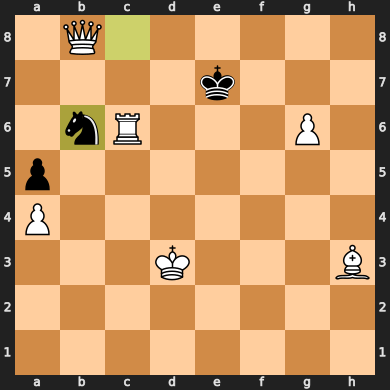




Legal moves
	 ['Qh8', 'Qg8', 'Qf8+', 'Qe8+', 'Qd8+', 'Qc8', 'Qa8', 'Qc7+', 'Qb7+', 'Qa7+', 'Qd6+', 'Qxb6', 'Qe5+', 'Qf4', 'Qg3', 'Qh2', 'Rc8', 'Rc7+', 'Rf6', 'Re6+', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'g7']
Opponent played: e7f8


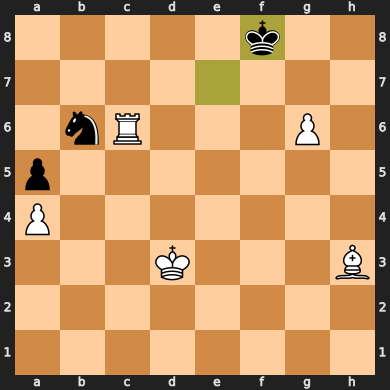




Legal moves
	 ['Rc8+', 'Rc7', 'Rf6+', 'Re6', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'g7+']
Opponent played: f8g8


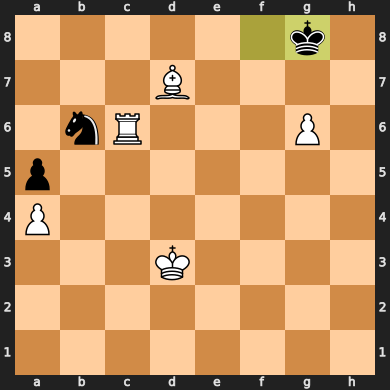




Legal moves
	 ['Be8', 'Bc8', 'Be6+', 'Bf5', 'Bg4', 'Bh3', 'Rc8+', 'Rc7', 'Rf6', 'Re6', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Ke4', 'Kd4', 'Ke3', 'Kc3', 'Ke2', 'Kd2', 'Kc2', 'g7']
Opponent played: g8h8


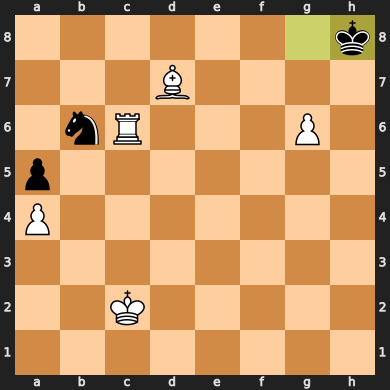




Legal moves
	 ['Be8', 'Bc8', 'Be6', 'Bf5', 'Bg4', 'Bh3', 'Rc8+', 'Rc7', 'Rf6', 'Re6', 'Rd6', 'Rxb6', 'Rc5', 'Rc4', 'Rc3', 'Kd3', 'Kc3', 'Kb3', 'Kd2', 'Kb2', 'Kd1', 'Kc1', 'Kb1', 'g7+']
Opponent played: b6c8


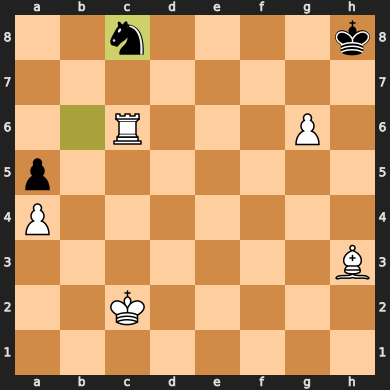




Legal moves
	 ['Rxc8+', 'Rc7', 'Rf6', 'Re6', 'Rd6', 'Rb6', 'Ra6', 'Rc5', 'Rc4', 'Rc3', 'Bxc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kd3', 'Kc3', 'Kb3', 'Kd2', 'Kb2', 'Kd1', 'Kc1', 'Kb1', 'g7+']
Opponent played: c8e7


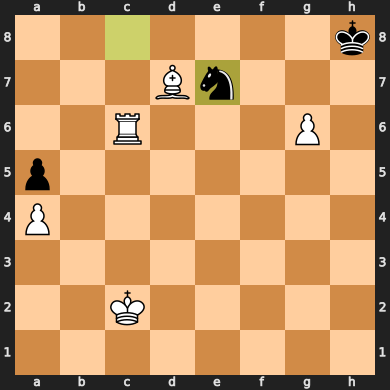




Legal moves
	 ['Be8', 'Bc8', 'Be6', 'Bf5', 'Bg4', 'Bh3', 'Rc8+', 'Rc7', 'Rf6', 'Re6', 'Rd6', 'Rb6', 'Ra6', 'Rc5', 'Rc4', 'Rc3', 'Kd3', 'Kc3', 'Kb3', 'Kd2', 'Kb2', 'Kd1', 'Kc1', 'Kb1', 'g7+']
Opponent played: e7g6


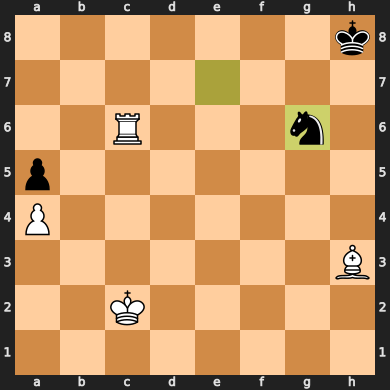




Legal moves
	 ['Rc8+', 'Rc7', 'Rxg6', 'Rf6', 'Re6', 'Rd6', 'Rb6', 'Ra6', 'Rc5', 'Rc4', 'Rc3', 'Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kd3', 'Kc3', 'Kb3', 'Kd2', 'Kb2', 'Kd1', 'Kc1', 'Kb1']
Opponent played: h8g8


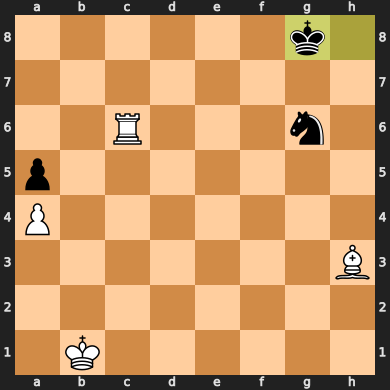




Legal moves
	 ['Rc8+', 'Rc7', 'Rxg6+', 'Rf6', 'Re6', 'Rd6', 'Rb6', 'Ra6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rc1', 'Bc8', 'Bd7', 'Be6+', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: g6e7


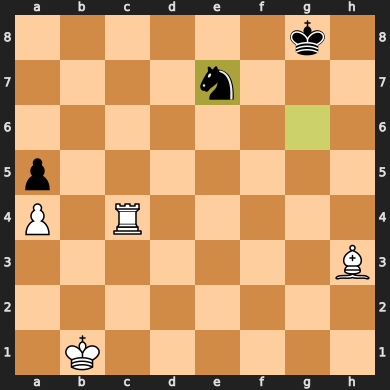




Legal moves
	 ['Rc8+', 'Rc7', 'Rc6', 'Rc5', 'Rh4', 'Rg4+', 'Rf4', 'Re4', 'Rd4', 'Rb4', 'Rc3', 'Rc2', 'Rc1', 'Bc8', 'Bd7', 'Be6+', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: g8h7


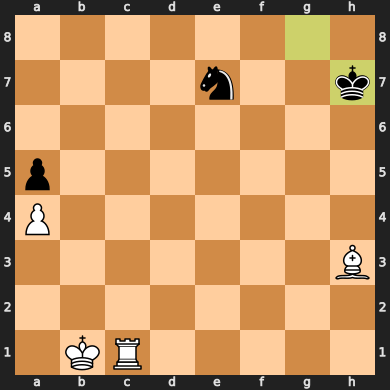




Legal moves
	 ['Bc8', 'Bd7', 'Be6', 'Bf5+', 'Bg4', 'Bg2', 'Bf1', 'Rc8', 'Rc7', 'Rc6', 'Rc5', 'Rc4', 'Rc3', 'Rc2', 'Rh1', 'Rg1', 'Rf1', 'Re1', 'Rd1', 'Kc2', 'Kb2', 'Ka2', 'Ka1']
Opponent played: h7g6


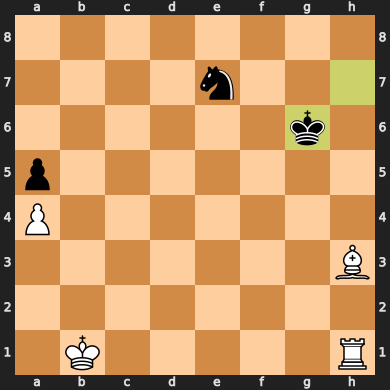




Legal moves
	 ['Bc8', 'Bd7', 'Be6', 'Bf5+', 'Bg4', 'Bg2', 'Bf1', 'Rh2', 'Rg1+', 'Rf1', 'Re1', 'Rd1', 'Rc1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: g6g5


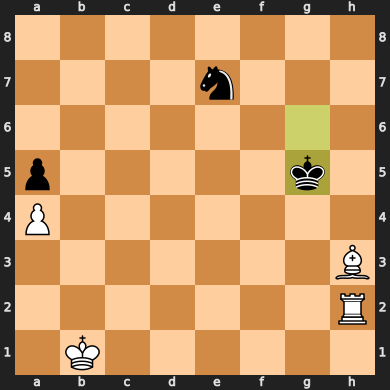




Legal moves
	 ['Bc8', 'Bd7', 'Be6', 'Bf5', 'Bg4', 'Bg2', 'Bf1', 'Rg2+', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rh1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: e7c8


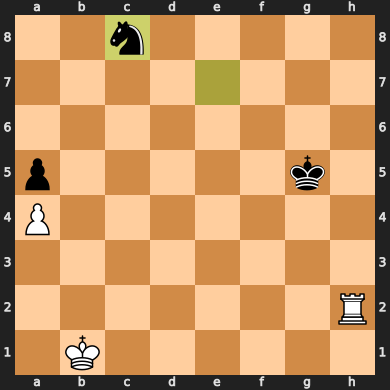




Legal moves
	 ['Rh8', 'Rh7', 'Rh6', 'Rh5+', 'Rh4', 'Rh3', 'Rg2+', 'Rf2', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rh1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: g5f5


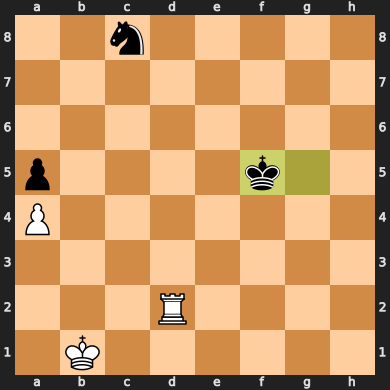




Legal moves
	 ['Rd8', 'Rd7', 'Rd6', 'Rd5+', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2+', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1', 'Kc2', 'Kb2', 'Ka2', 'Kc1', 'Ka1']
Opponent played: c8e7


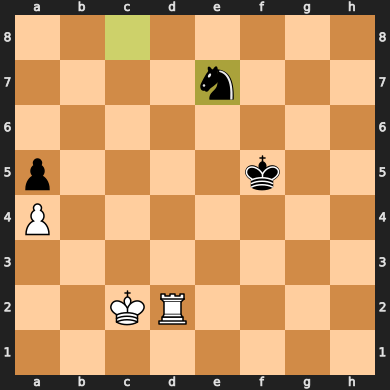




Legal moves
	 ['Rd8', 'Rd7', 'Rd6', 'Rd5+', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2+', 'Re2', 'Rd1', 'Kd3', 'Kc3', 'Kb3', 'Kb2', 'Kd1', 'Kc1', 'Kb1']
Opponent played: e7d5


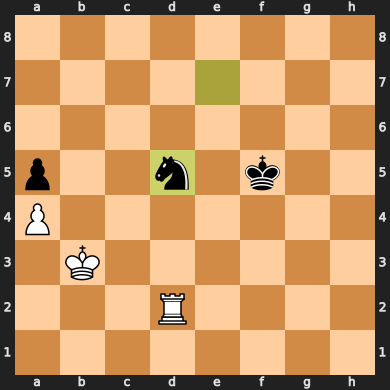




Legal moves
	 ['Kc4', 'Ka3', 'Kc2', 'Kb2', 'Ka2', 'Rxd5+', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2+', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1']
Opponent played: f5e6


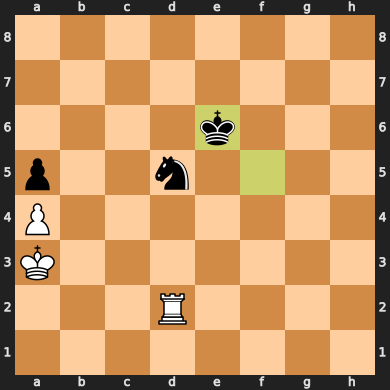




Legal moves
	 ['Kb3', 'Kb2', 'Ka2', 'Rxd5', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2', 'Re2+', 'Rc2', 'Rb2', 'Ra2', 'Rd1']
Opponent played: d5b4


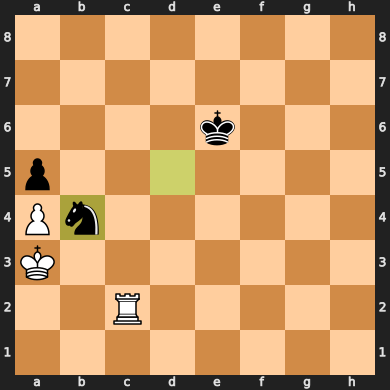




Legal moves
	 ['Kb3', 'Kb2', 'Rc8', 'Rc7', 'Rc6+', 'Rc5', 'Rc4', 'Rc3', 'Rh2', 'Rg2', 'Rf2', 'Re2+', 'Rd2', 'Rb2', 'Ra2', 'Rc1']
Opponent played: e6f5


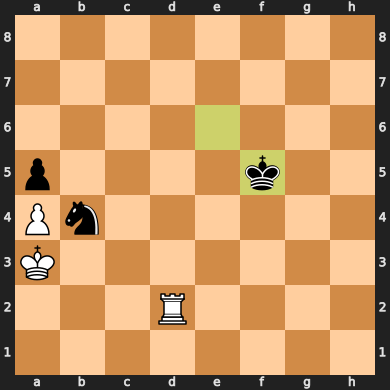




Legal moves
	 ['Kb3', 'Kb2', 'Rd8', 'Rd7', 'Rd6', 'Rd5+', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2+', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1']
Opponent played: b4d5


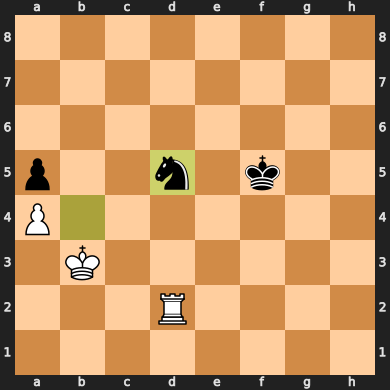




Legal moves
	 ['Kc4', 'Ka3', 'Kc2', 'Kb2', 'Ka2', 'Rxd5+', 'Rd4', 'Rd3', 'Rh2', 'Rg2', 'Rf2+', 'Re2', 'Rc2', 'Rb2', 'Ra2', 'Rd1']
Opponent played: f5g5


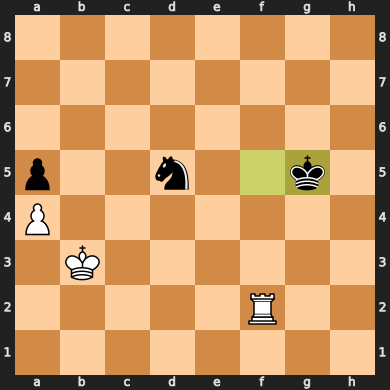




Legal moves
	 ['Kc4', 'Ka3', 'Kc2', 'Kb2', 'Ka2', 'Rf8', 'Rf7', 'Rf6', 'Rf5+', 'Rf4', 'Rf3', 'Rh2', 'Rg2+', 'Re2', 'Rd2', 'Rc2', 'Rb2', 'Ra2', 'Rf1']
Opponent played: d5c3


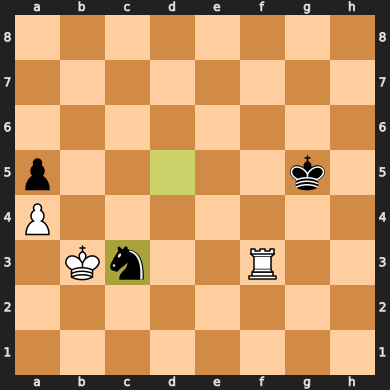




Legal moves
	 ['Rf8', 'Rf7', 'Rf6', 'Rf5+', 'Rf4', 'Rh3', 'Rg3+', 'Re3', 'Rd3', 'Rxc3', 'Rf2', 'Rf1', 'Kc4', 'Kxc3', 'Ka3', 'Kc2', 'Kb2']
Opponent played: g5h4


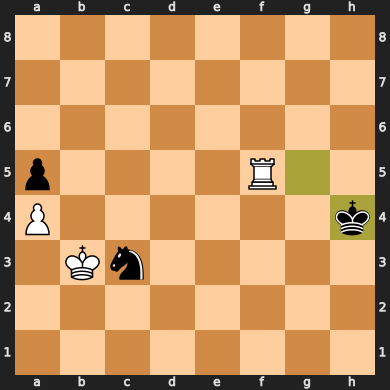




Legal moves
	 ['Rf8', 'Rf7', 'Rf6', 'Rh5+', 'Rg5', 'Re5', 'Rd5', 'Rc5', 'Rb5', 'Rxa5', 'Rf4+', 'Rf3', 'Rf2', 'Rf1', 'Kc4', 'Kxc3', 'Ka3', 'Kc2', 'Kb2']
Opponent played: h4h5


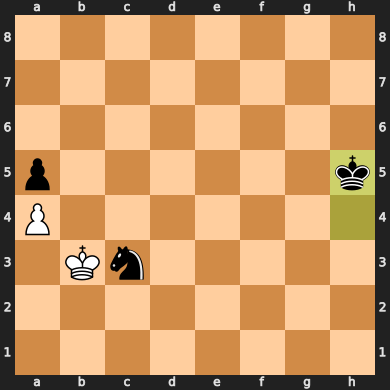




Legal moves
	 ['Kc4', 'Kxc3', 'Ka3', 'Kc2', 'Kb2']
Opponent played: h5h6


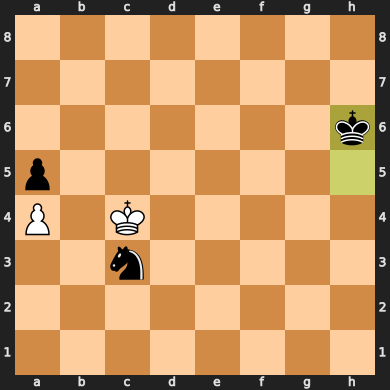




Legal moves
	 ['Kc5', 'Kd4', 'Kd3', 'Kxc3', 'Kb3']
Opponent played: c3e4


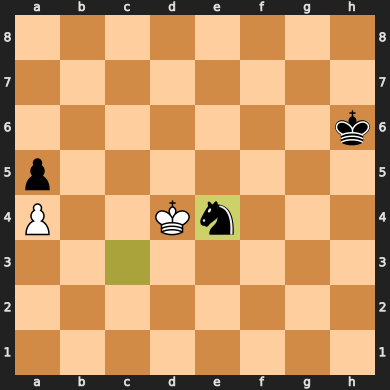




Legal moves
	 ['Ke5', 'Kd5', 'Kxe4', 'Kc4', 'Ke3', 'Kd3']
Opponent played: h6g7


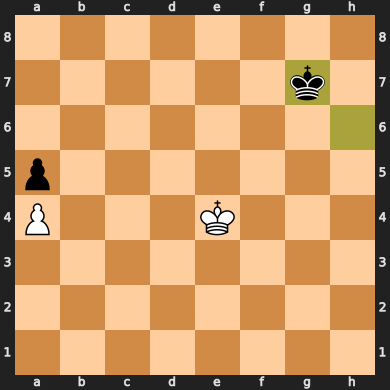




Legal moves
	 ['Kf5', 'Ke5', 'Kd5', 'Kf4', 'Kd4', 'Kf3', 'Ke3', 'Kd3']
Opponent played: g7f7


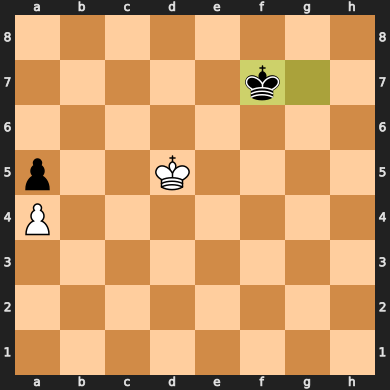




Legal moves
	 ['Kd6', 'Kc6', 'Ke5', 'Kc5', 'Ke4', 'Kd4', 'Kc4']
Opponent played: f7g7


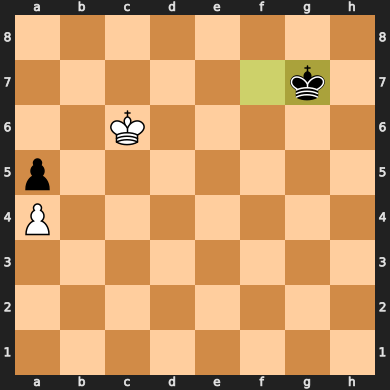




Legal moves
	 ['Kd7', 'Kc7', 'Kb7', 'Kd6', 'Kb6', 'Kd5', 'Kc5', 'Kb5']
Opponent played: g7f6


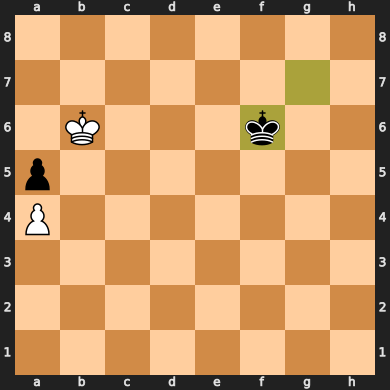




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'Kxa5']
Opponent played: f6g5


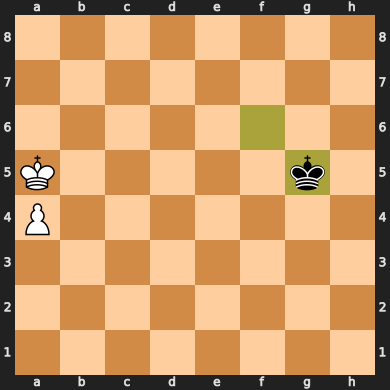




Legal moves
	 ['Kb6', 'Ka6', 'Kb5', 'Kb4']
Opponent played: g5h4


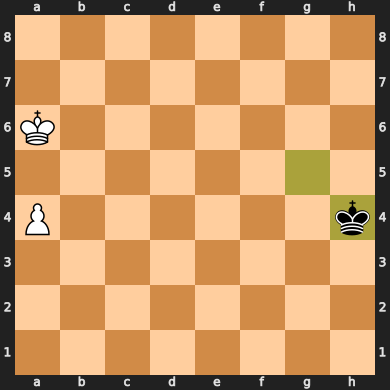




Legal moves
	 ['Kb7', 'Ka7', 'Kb6', 'Kb5', 'Ka5', 'a5']
Opponent played: h4g5


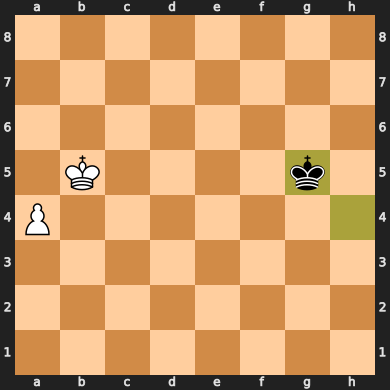




Legal moves
	 ['Kc6', 'Kb6', 'Ka6', 'Kc5', 'Ka5', 'Kc4', 'Kb4', 'a5']
Opponent played: g5g4


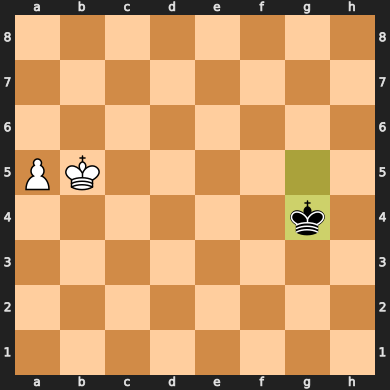




Legal moves
	 ['Kc6', 'Kb6', 'Ka6', 'Kc5', 'Kc4', 'Kb4', 'Ka4', 'a6']
Opponent played: g4f4


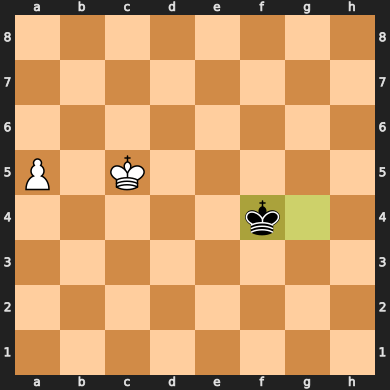




Legal moves
	 ['Kd6', 'Kc6', 'Kb6', 'Kd5', 'Kb5', 'Kd4', 'Kc4', 'Kb4', 'a6']
Opponent played: f4e4


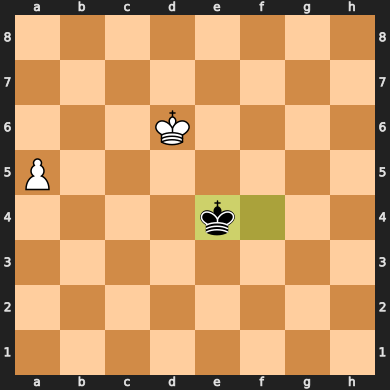




Legal moves
	 ['Ke7', 'Kd7', 'Kc7', 'Ke6', 'Kc6', 'Kc5', 'a6']
Opponent played: e4d5


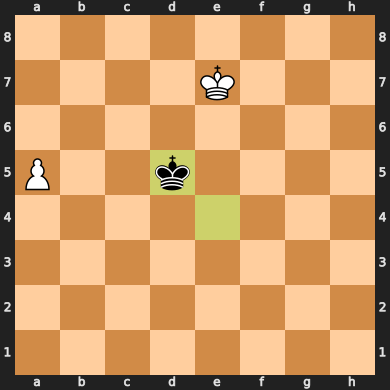




Legal moves
	 ['Kf8', 'Ke8', 'Kd8', 'Kf7', 'Kd7', 'Kf6', 'a6']
Opponent played: d5d6


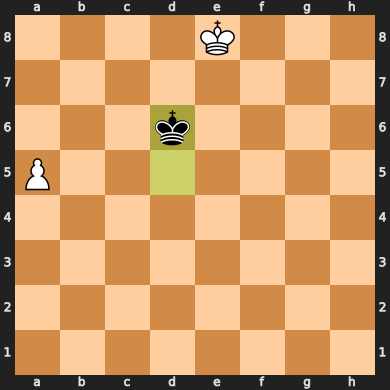




Legal moves
	 ['Kf8', 'Kd8', 'Kf7', 'a6']
Opponent played: d6c6


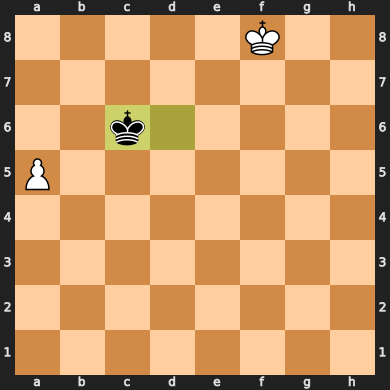




Legal moves
	 ['Kg8', 'Ke8', 'Kg7', 'Kf7', 'Ke7', 'a6']
Opponent played: c6d5


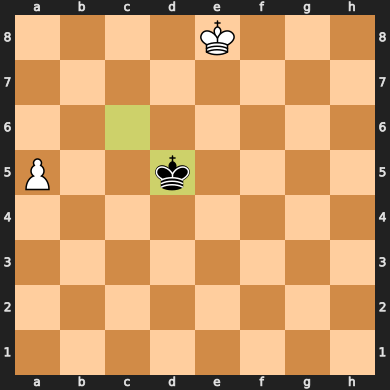




Legal moves
	 ['Kf8', 'Kd8', 'Kf7', 'Ke7', 'Kd7', 'a6']
Opponent played: d5c4


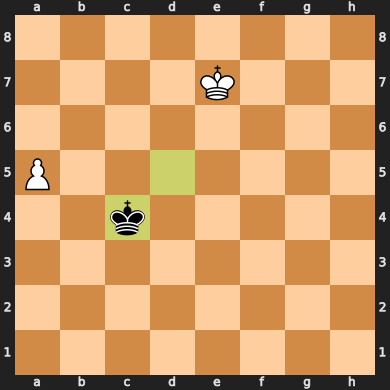




Legal moves
	 ['Kf8', 'Ke8', 'Kd8', 'Kf7', 'Kd7', 'Kf6', 'Ke6', 'Kd6', 'a6']
Opponent played: c4d4


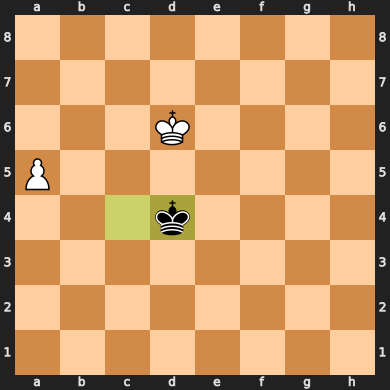




Legal moves
	 ['Ke7', 'Kd7', 'Kc7', 'Ke6', 'Kc6', 'a6']
Opponent played: d4e5


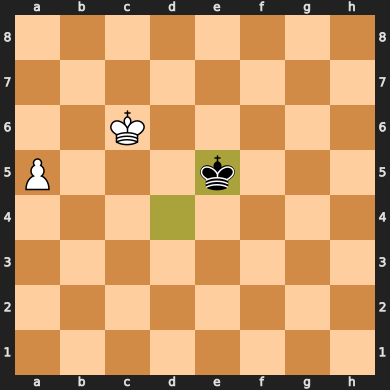




Legal moves
	 ['Kd7', 'Kc7', 'Kb7', 'Kb6', 'Kc5', 'Kb5', 'a6']
Opponent played: e5e4


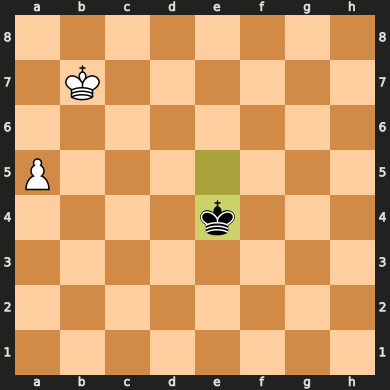




Legal moves
	 ['Kc8', 'Kb8', 'Ka8', 'Kc7', 'Ka7', 'Kc6', 'Kb6', 'Ka6', 'a6']
Opponent played: e4f5


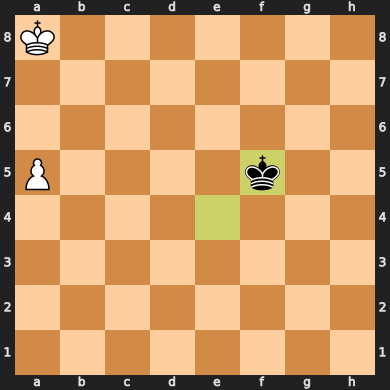




Legal moves
	 ['Kb8', 'Kb7', 'Ka7', 'a6']
Opponent played: f5e6


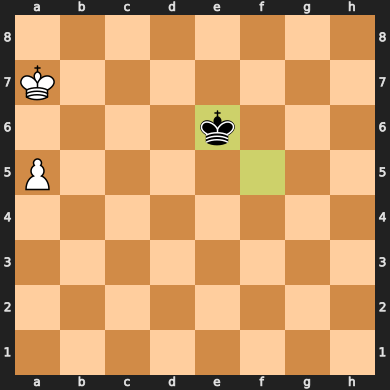




Legal moves
	 ['Kb8', 'Ka8', 'Kb7', 'Kb6', 'Ka6', 'a6']
Opponent played: e6f6


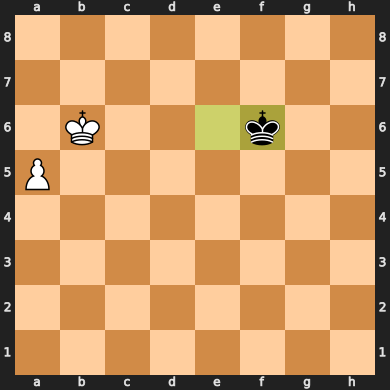




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'a6']
Opponent played: f6g5


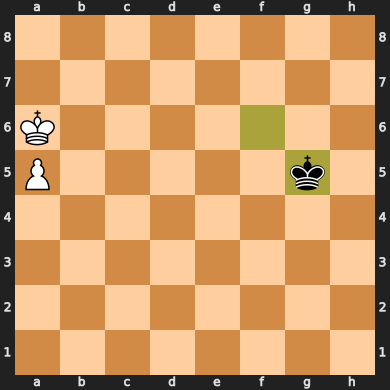




Legal moves
	 ['Kb7', 'Ka7', 'Kb6', 'Kb5']
Opponent played: g5h5


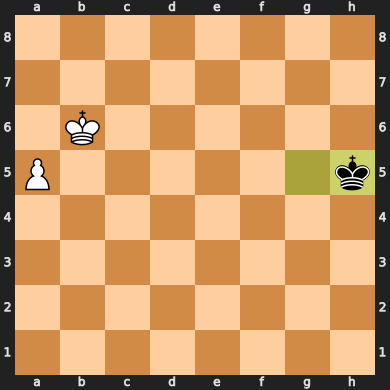




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'a6']
Opponent played: h5g6


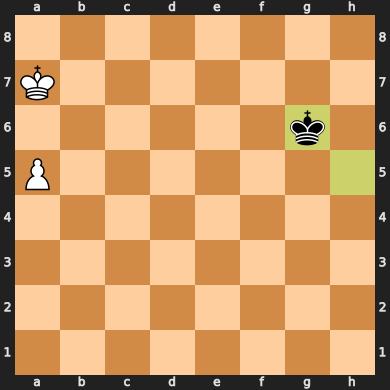




Legal moves
	 ['Kb8', 'Ka8', 'Kb7', 'Kb6', 'Ka6', 'a6']
Opponent played: g6h5


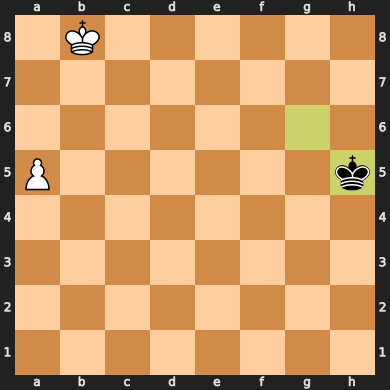




Legal moves
	 ['Kc8', 'Ka8', 'Kc7', 'Kb7', 'Ka7', 'a6']
Opponent played: h5g5


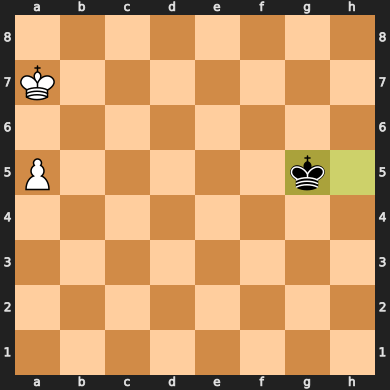




Legal moves
	 ['Kb8', 'Ka8', 'Kb7', 'Kb6', 'Ka6', 'a6']
Opponent played: g5g4


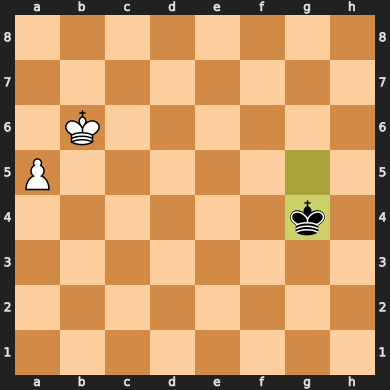




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'a6']
Opponent played: g4g3


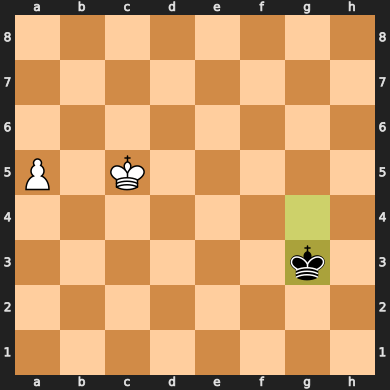




Legal moves
	 ['Kd6', 'Kc6', 'Kb6', 'Kd5', 'Kb5', 'Kd4', 'Kc4', 'Kb4', 'a6']
Opponent played: g3f2


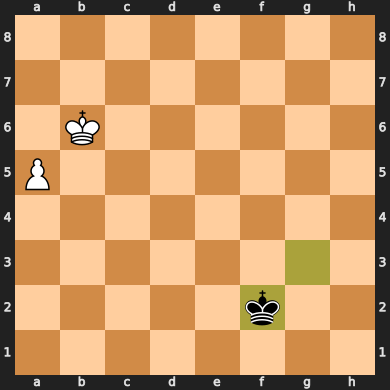




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'a6']
Opponent played: f2g2


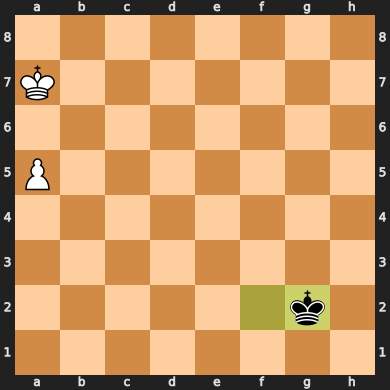




Legal moves
	 ['Kb8', 'Ka8', 'Kb7', 'Kb6', 'Ka6', 'a6']
Opponent played: g2g1


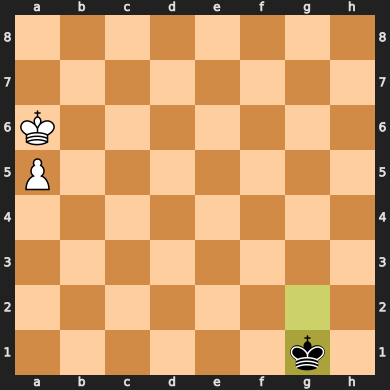




Legal moves
	 ['Kb7', 'Ka7', 'Kb6', 'Kb5']
Opponent played: g1g2


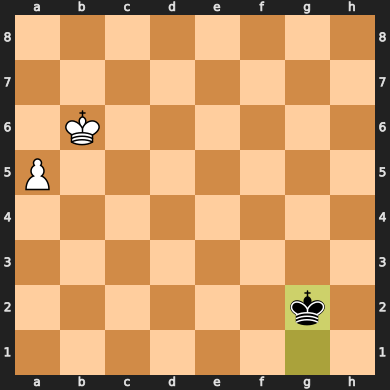




Legal moves
	 ['Kc7', 'Kb7', 'Ka7', 'Kc6', 'Ka6', 'Kc5', 'Kb5', 'a6']
Opponent played: g2g1


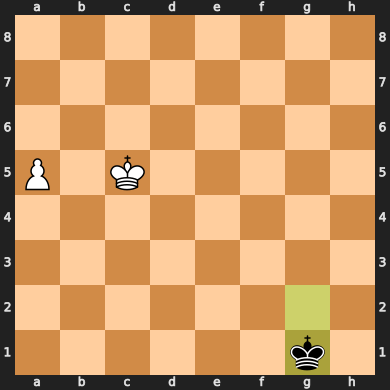




Legal moves
	 ['Kd6', 'Kc6', 'Kb6', 'Kd5', 'Kb5', 'Kd4', 'Kc4', 'Kb4', 'a6']
Opponent played: g1g2


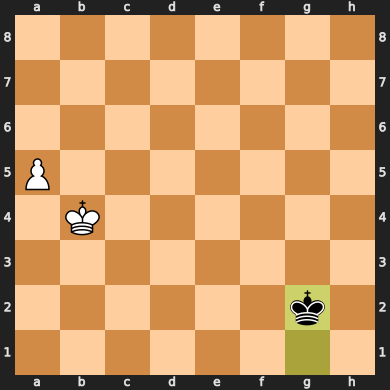




Legal moves
	 ['Kc5', 'Kb5', 'Kc4', 'Ka4', 'Kc3', 'Kb3', 'Ka3', 'a6']
Opponent played: g2g1


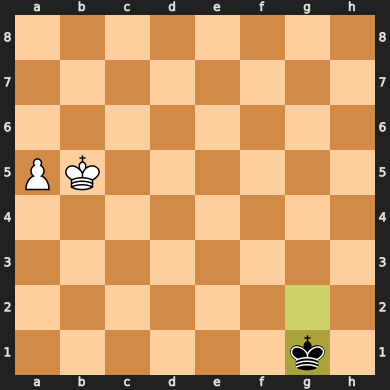




Legal moves
	 ['Kc6', 'Kb6', 'Ka6', 'Kc5', 'Kc4', 'Kb4', 'Ka4', 'a6']
Opponent played: g1f2


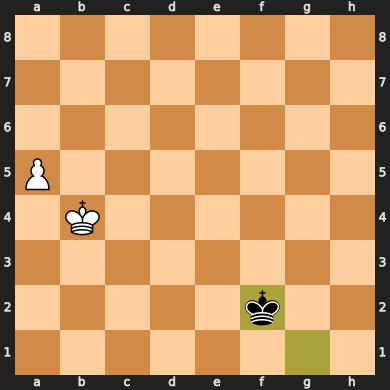




Legal moves
	 ['Kc5', 'Kb5', 'Kc4', 'Ka4', 'Kc3', 'Kb3', 'Ka3', 'a6']
Opponent played: f2f1


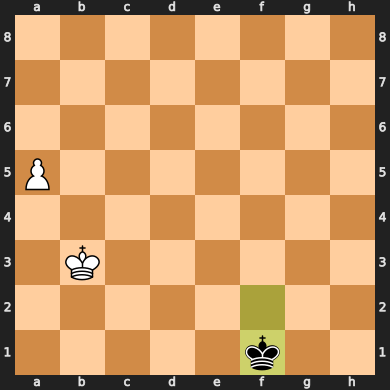




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Kc3', 'Ka3', 'Kc2', 'Kb2', 'Ka2', 'a6']
Opponent played: f1f2


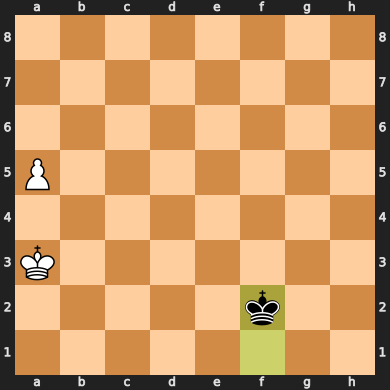




Legal moves
	 ['Kb4', 'Ka4', 'Kb3', 'Kb2', 'Ka2', 'a6']
Opponent played: f2g2


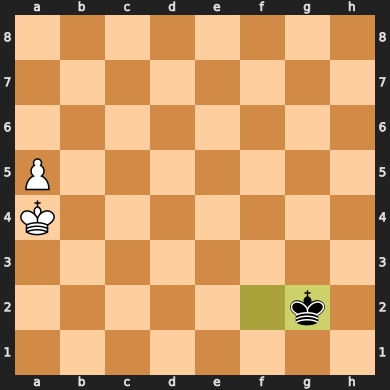




Legal moves
	 ['Kb5', 'Kb4', 'Kb3', 'Ka3', 'a6']
Opponent played: g2f1


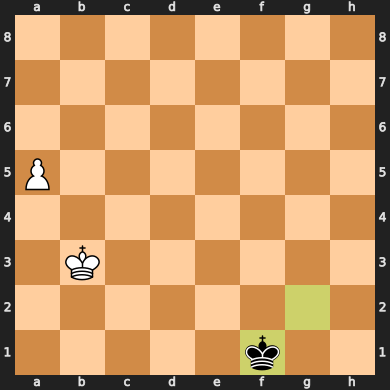




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Kc3', 'Ka3', 'Kc2', 'Kb2', 'Ka2', 'a6']
Opponent played: f1e2


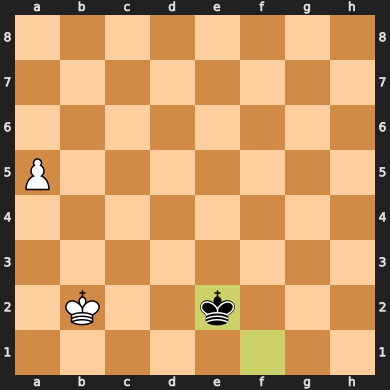




Legal moves
	 ['Kc3', 'Kb3', 'Ka3', 'Kc2', 'Ka2', 'Kc1', 'Kb1', 'Ka1', 'a6']
Opponent played: e2d2


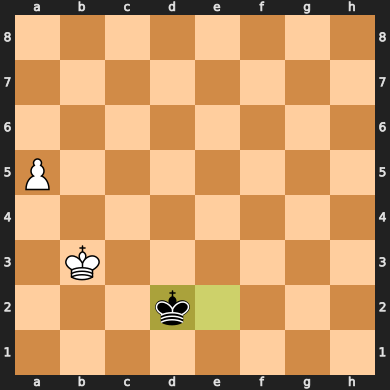




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Ka3', 'Kb2', 'Ka2', 'a6']
Opponent played: d2c1


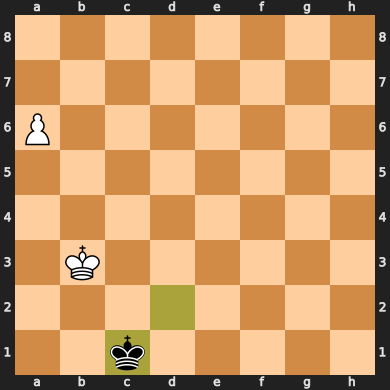




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Kc3', 'Ka3', 'Ka2', 'a7']
Opponent played: c1c2


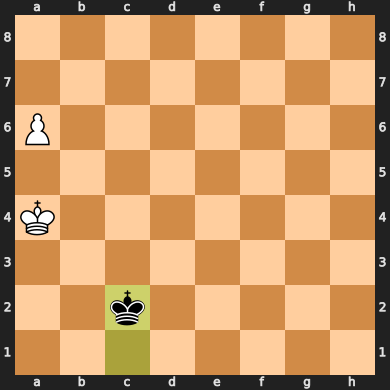




Legal moves
	 ['Kb5', 'Ka5', 'Kb4', 'Ka3', 'a7']
Opponent played: c2b1


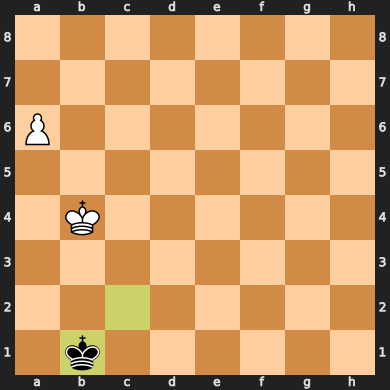




Legal moves
	 ['Kc5', 'Kb5', 'Ka5', 'Kc4', 'Ka4', 'Kc3', 'Kb3', 'Ka3', 'a7']
Opponent played: b1c1


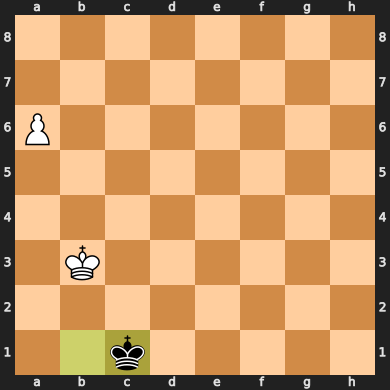




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Kc3', 'Ka3', 'Ka2', 'a7']
Opponent played: c1b1


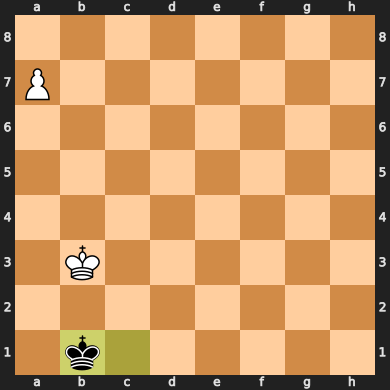




Legal moves
	 ['Kc4', 'Kb4', 'Ka4', 'Kc3', 'Ka3', 'a8=Q', 'a8=R', 'a8=B', 'a8=N']
Opponent played: b1a1


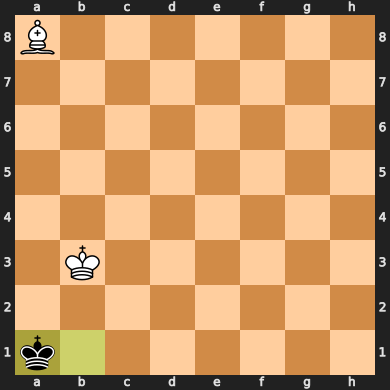

In [13]:
board = chess.Board()
display(board)

while True:
    if board.is_game_over(): break
    
    legal_moves = [to_san(board, move.__str__()) for move in board.legal_moves]
    print('Legal moves')
    print('\t', legal_moves)
    
    move = 'a'#input('make a move: ')
    if move == '':
       break
    
    make_move(board, get_ai_move(board)) # move
    
    opponent_move = get_ai_move(board)
    
    make_move(board, opponent_move)
    print('Opponent played:', opponent_move)
    
    
    display(board)
    print('\n\n')
    
    

In [16]:
board.outcome()

Outcome(termination=<Termination.INSUFFICIENT_MATERIAL: 3>, winner=None)

In [14]:
board.outcome().winner == chess.WHITE

False